In [ ]:
pip install lifetimes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 8.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from google.colab import drive
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.utils import summary_data_from_transaction_data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('your csv path')

In [ ]:
df.head()

,id,status,created_at,year,total_transaction_amount,total_profit,transaction_frequency
0,2,Shipped,2022-12-09,2022,199.949997,25.193700,1
1,2,Processing,2023-08-12,2023,189.989998,23.258159,2
2,2,Complete,2025-09-12,2025,16.000000,-3.104000,1
3,3,Shipped,2025-12-02,2025,145.139999,24.673800,1
4,3,Shipped,2025-12-04,2025,24.990000,-4.948020,1


In [ ]:
df.drop(columns='transaction_frequency', inplace=True)

In [ ]:
df['status'].value_counts()

,count
status,
Shipped,34028
Complete,28449
Processing,22839
Cancelled,16960
Returned,11239


In [ ]:
df_valid_trx = df[df['status']=='Complete']

In [ ]:
df_valid_trx['created_at'] = pd.to_datetime(df_valid_trx['created_at'],errors='coerce')

In [ ]:
df_valid_trx = df_valid_trx[df_valid_trx['created_at']< '2025-12-01']

In [ ]:
df_valid_trx.reset_index(drop=True)

,id,status,created_at,year,total_transaction_amount,total_profit
0,2,Complete,2025-09-12,2025,16.000000,-3.104000
1,10,Complete,2020-10-15,2020,74.989998,-3.599520
2,13,Complete,2022-01-31,2022,19.990000,-3.118440
3,22,Complete,2023-07-23,2023,28.990000,3.536780
4,26,Complete,2025-11-09,2025,149.990005,37.797481
...,...,...,...,...,...,...
27762,68805,Complete,2020-06-13,2020,48.000000,5.376000
27763,68806,Complete,2024-10-11,2024,264.000000,-16.896000
27764,68808,Complete,2023-02-22,2023,19.200001,-4.953600
27765,68812,Complete,2022-12-18,2022,9.950000,-2.189000


Visualize transaction amount and profit trend from timeseries data

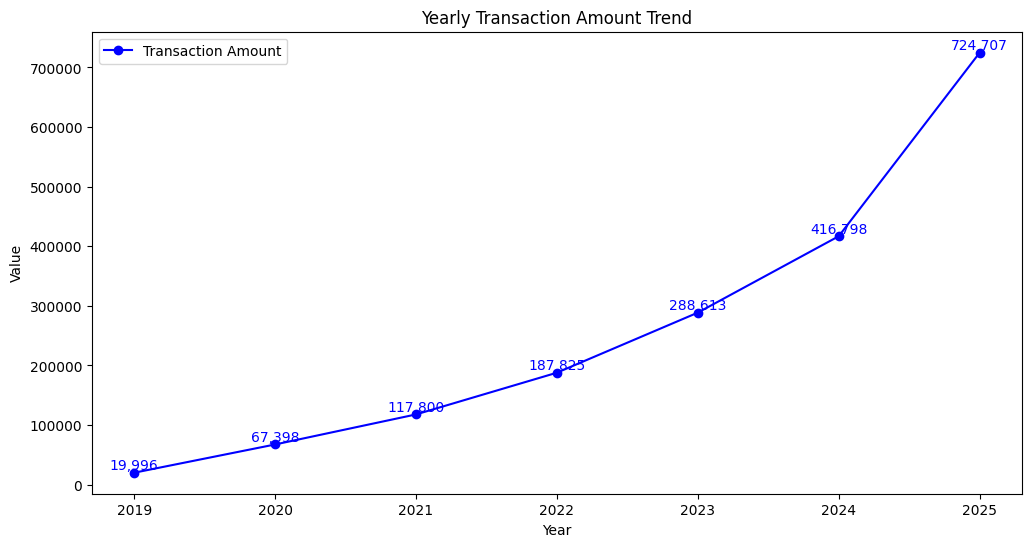

In [ ]:
trx_amount = df_valid_trx.groupby('year')['total_transaction_amount'].sum()

plt.figure(figsize=(12, 6))

plt.plot(trx_amount.index, trx_amount.values, marker='o', color='blue', label='Transaction Amount')
for x, y in zip(trx_amount.index, trx_amount.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', color='blue')

plt.title('Yearly Transaction Amount Trend')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


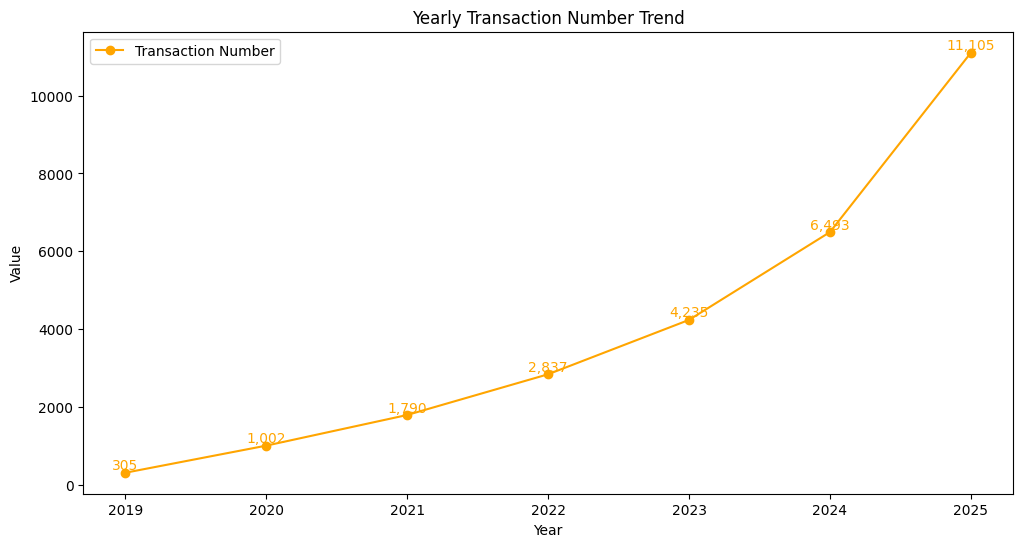

In [ ]:
trx_number = df_valid_trx.groupby('year')['id'].count()

plt.figure(figsize=(12, 6))

plt.plot(trx_number.index, trx_number.values, marker='o', color='orange', label='Transaction Number')
for x, y in zip(trx_number.index, trx_number.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', color='orange')

plt.title('Yearly Transaction Number Trend')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


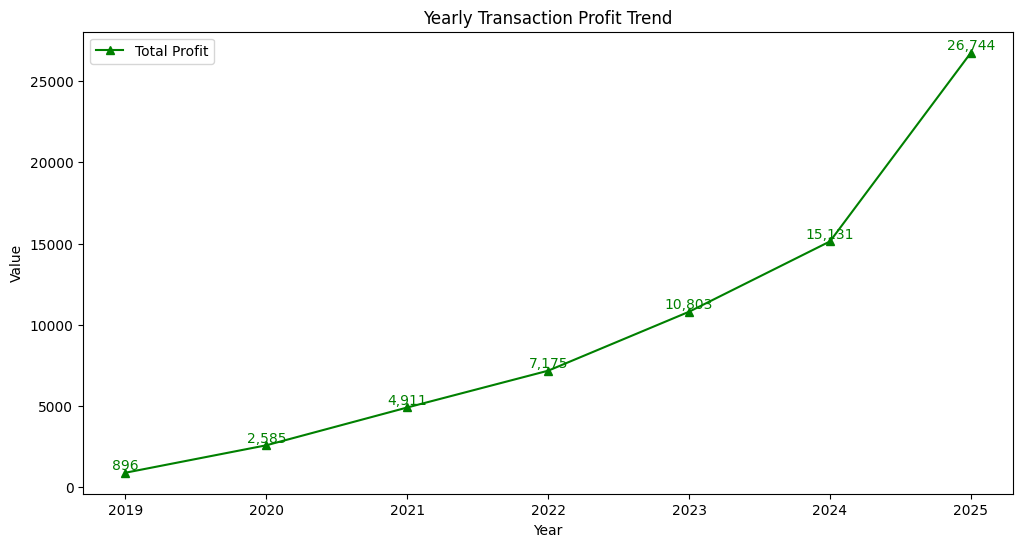

In [ ]:
trx_profit = df_valid_trx.groupby('year')['total_profit'].sum()
plt.figure(figsize=(12, 6))


plt.plot(trx_profit.index, trx_profit.values, marker='^', color='green', label='Total Profit')
for x, y in zip(trx_profit.index, trx_profit.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', color='green')

plt.title('Yearly Transaction Profit Trend')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


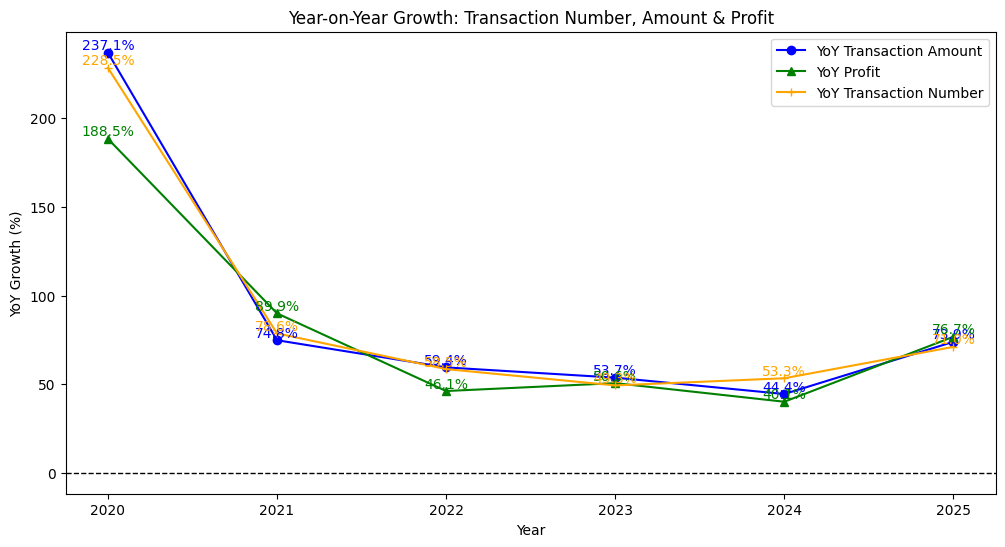

In [ ]:

trx_amount = df_valid_trx.groupby('year')['total_transaction_amount'].sum().sort_index()
trx_profit = df_valid_trx.groupby('year')['total_profit'].sum().sort_index()
trx_number = df_valid_trx.groupby('year')['id'].count().sort_index()

yoy_trx_amount = trx_amount.pct_change() * 100
yoy_trx_profit = trx_profit.pct_change() * 100
yoy_trx_number = trx_number.pct_change() * 100

plt.figure(figsize=(12, 6))

plt.plot(yoy_trx_amount.index, yoy_trx_amount.values, marker='o', color='blue', label='YoY Transaction Amount')
for x, y in zip(yoy_trx_amount.index, yoy_trx_amount.values):
    plt.text(x, y, f'{y:.1f}%', ha='center', va='bottom', color='blue')

plt.plot(yoy_trx_profit.index, yoy_trx_profit.values, marker='^', color='green', label='YoY Profit')
for x, y in zip(yoy_trx_profit.index, yoy_trx_profit.values):
    plt.text(x, y, f'{y:.1f}%', ha='center', va='bottom', color='green')

plt.plot(yoy_trx_number.index, yoy_trx_number.values, marker='+', color='orange', label='YoY Transaction Number')
for x, y in zip(yoy_trx_number.index, yoy_trx_number.values):
    plt.text(x, y, f'{y:.1f}%', ha='center', va='bottom', color='orange')

plt.title('Year-on-Year Growth: Transaction Number, Amount & Profit')
plt.xlabel('Year')
plt.ylabel('YoY Growth (%)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.show()


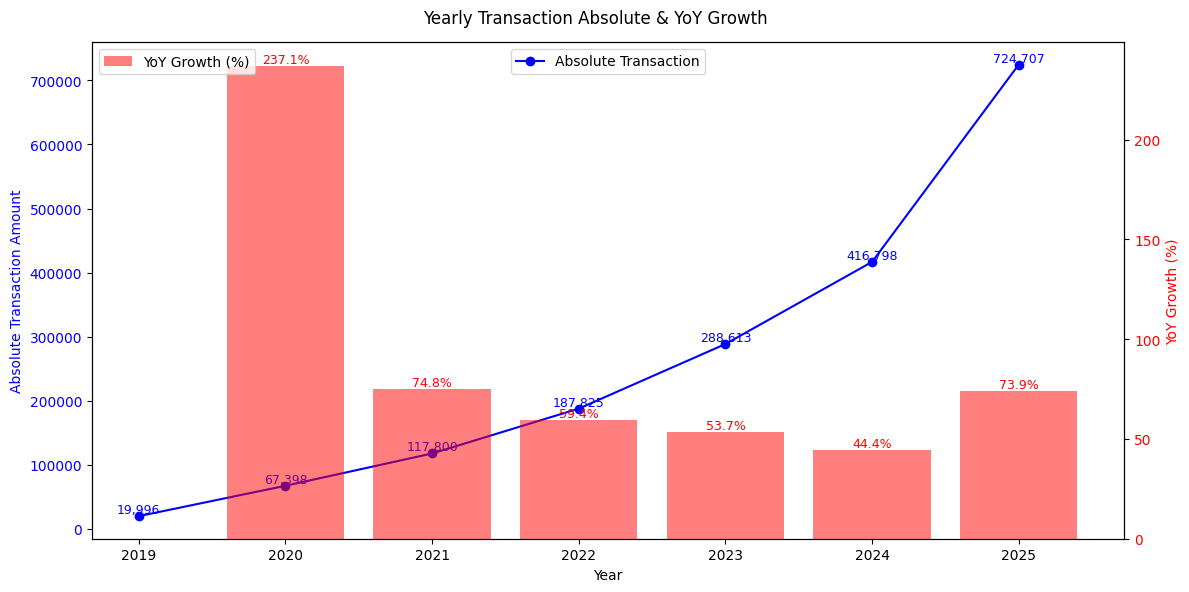

In [ ]:
trx_amount = df_valid_trx.groupby('year')['total_transaction_amount'].sum().sort_index()
yoy_trx_amount = trx_amount.pct_change() * 100

years = trx_amount.index.tolist()
absolute = trx_amount.values.tolist()
yoy = yoy_trx_amount.tolist()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(years, absolute, marker='o', color='blue', label='Absolute Transaction')
for x, y in zip(years, absolute):
    ax1.text(x, y, f'{y:,.0f}', ha='center', va='bottom', color='blue', fontsize=9)

ax1.set_xlabel('Year')
ax1.set_ylabel('Absolute Transaction Amount', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
for x, y in zip(years[1:], yoy[1:]):
    ax2.bar(x, y, color='red', alpha=0.5)
    va = 'bottom' if y >= 0 else 'top'
    ax2.text(x, y, f'{y:.1f}%', ha='center', va=va, color='red', fontsize=9)

ax2.set_ylabel('YoY Growth (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle('Yearly Transaction Absolute & YoY Growth')
ax1.legend(loc='upper center')
ax2.legend(['YoY Growth (%)'], loc='upper left')

plt.show()


/tmp/ipython-input-3460059089.py:9: RuntimeWarning: divide by zero encountered in divide
  df_yearly['CAGR(%)'] = ((df_yearly['Amount'] / begin_value) ** (1 / (years - years[0])) - 1) * 100


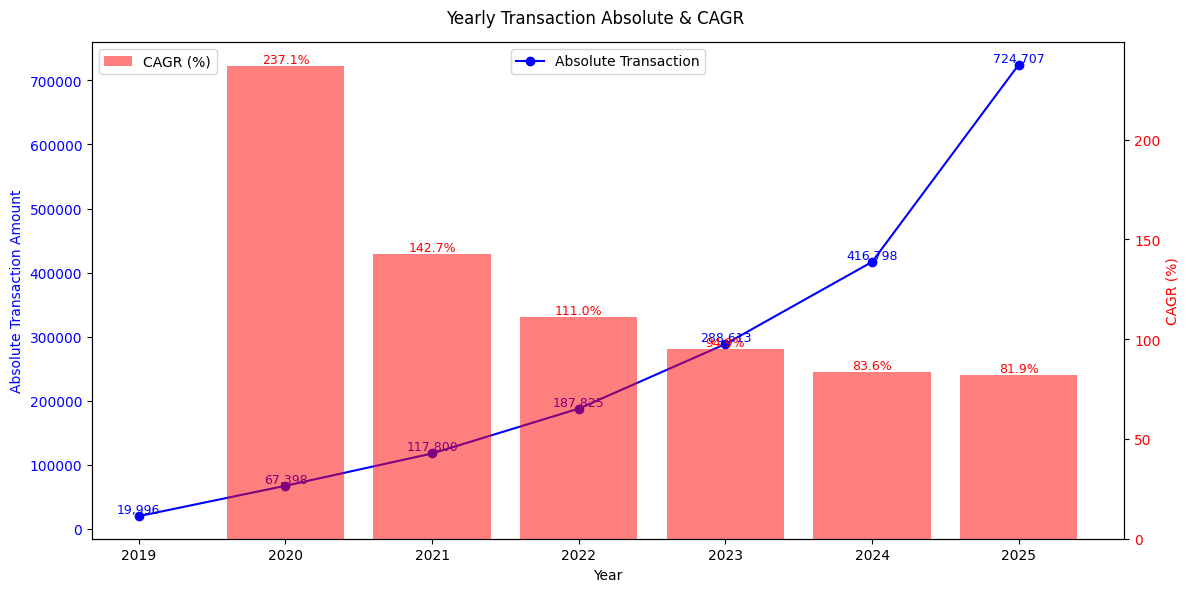

In [ ]:

df_yearly = trx_amount.reset_index()
df_yearly.rename(columns={'total_transaction_amount':'Amount'}, inplace=True)

df_yearly['Absolute'] = df_yearly['Amount']


years = df_yearly['year'].values
begin_value = df_yearly['Amount'].iloc[0]
df_yearly['CAGR(%)'] = ((df_yearly['Amount'] / begin_value) ** (1 / (years - years[0])) - 1) * 100


fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(years, df_yearly['Amount'], marker='o', color='blue', label='Absolute Transaction')
for x, y in zip(years, df_yearly['Amount']):
    ax1.text(x, y, f'{y:,.0f}', ha='center', va='bottom', color='blue', fontsize=9)

ax1.set_xlabel('Year')
ax1.set_ylabel('Absolute Transaction Amount', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.bar(years[1:], df_yearly['CAGR(%)'][1:], color='red', alpha=0.5, label='CAGR (%)')
for x, y in zip(years[1:], df_yearly['CAGR(%)'][1:]):
    va = 'bottom' if y >= 0 else 'top'
    ax2.text(x, y, f'{y:.1f}%', ha='center', va=va, color='red', fontsize=9)

ax2.set_ylabel('CAGR (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout(rect=[0,0,1,0.95])
fig.suptitle('Yearly Transaction Absolute & CAGR')
ax1.legend(loc='upper center')
ax2.legend(loc='upper left')

plt.show()


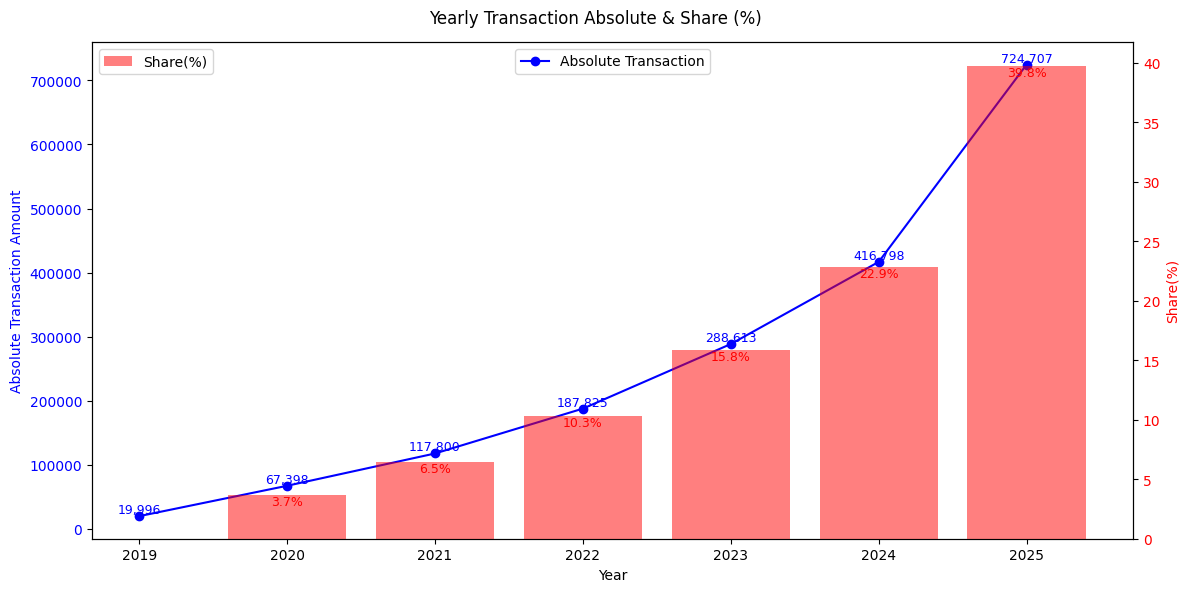

In [ ]:

df_yearly = trx_amount.reset_index()
df_yearly.rename(columns={'total_transaction_amount':'Amount'}, inplace=True)

df_yearly['Absolute'] = df_yearly['Amount']

total_amount = df_yearly['Amount'].sum()
df_yearly['Share(%)'] = df_yearly['Amount'] / total_amount * 100

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(years, df_yearly['Amount'], marker='o', color='blue', label='Absolute Transaction')
for x, y in zip(years, df_yearly['Amount']):
    ax1.text(x, y, f'{y:,.0f}', ha='center', va='bottom', color='blue', fontsize=9)

ax1.set_xlabel('Year')
ax1.set_ylabel('Absolute Transaction Amount', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.bar(years[1:], df_yearly['Share(%)'][1:], color='red', alpha=0.5, label='Share(%)')
for x, y in zip(years[1:], df_yearly['Share(%)'][1:]):
    va = 'top'
    ax2.text(x, y, f'{y:.1f}%', ha='center', va=va, color='red', fontsize=9)

ax2.set_ylabel('Share(%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout(rect=[0,0,1,0.95])
fig.suptitle('Yearly Transaction Absolute & Share (%)')
ax1.legend(loc='upper center')
ax2.legend(loc='upper left')

plt.show()


In [ ]:
df_valid_trx["Quarter"] = pd.to_datetime(df_valid_trx["created_at"]).dt.to_period("Q")

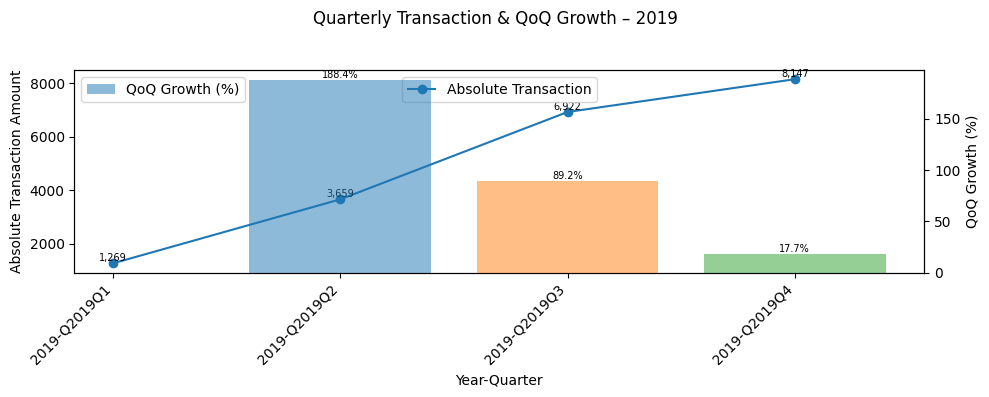

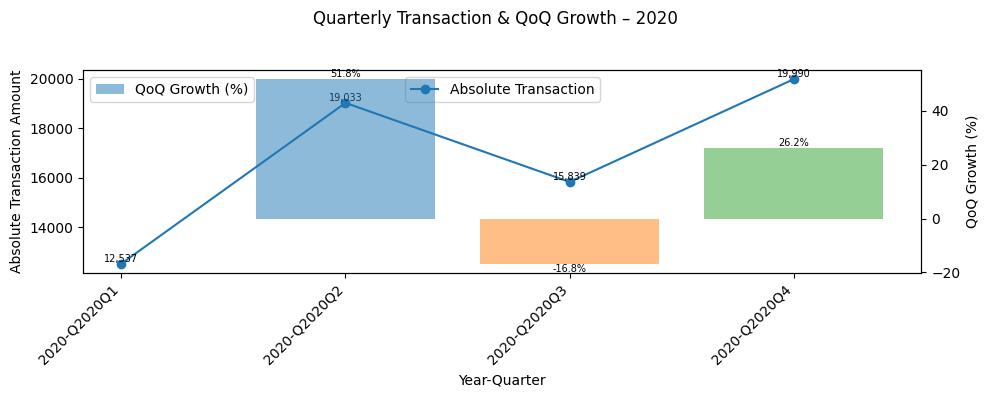

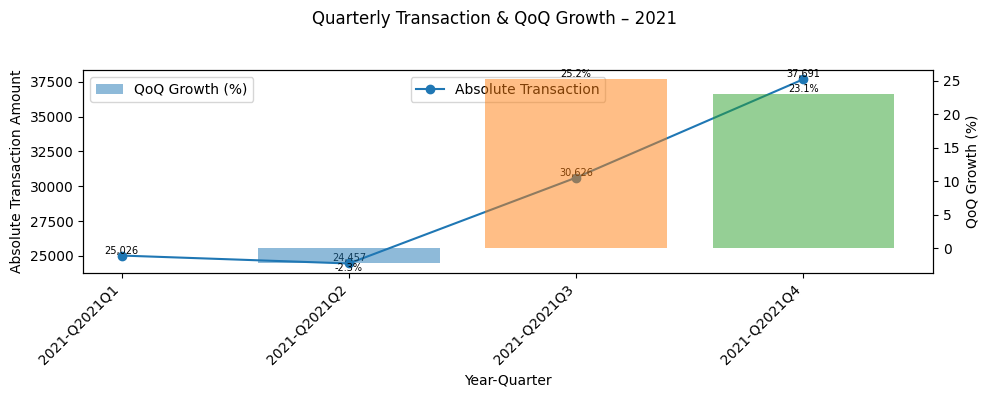

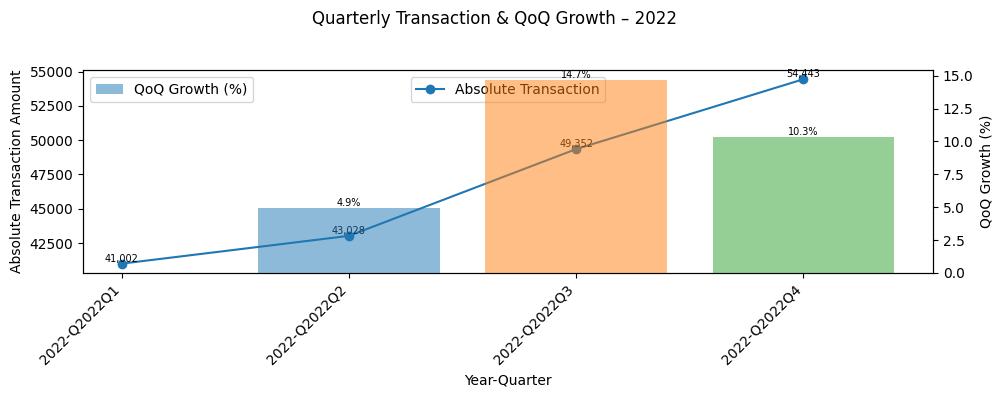

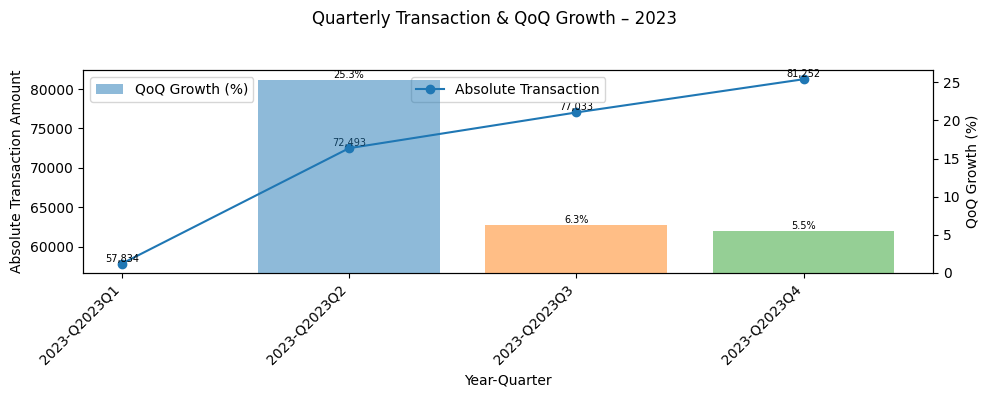

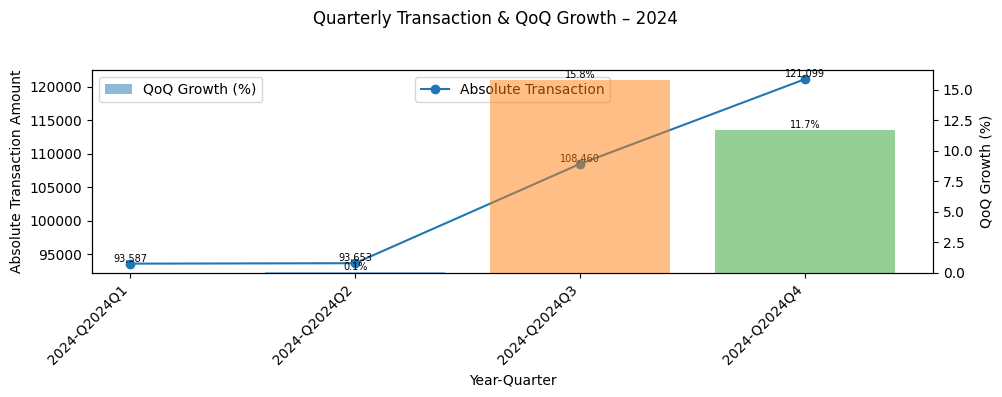

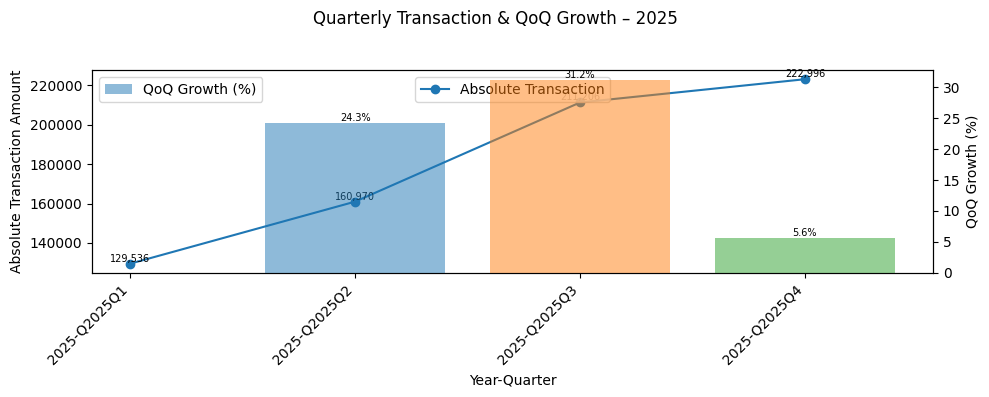

In [ ]:
trx_amount = (
    df_valid_trx
    .groupby(['year', 'Quarter'])['total_transaction_amount']
    .sum()
    .sort_index()
)

years = trx_amount.index.get_level_values(0).unique().tolist()

import matplotlib.pyplot as plt

for year in years:
    yearly_data = trx_amount.loc[year]

    qoq_growth = yearly_data.pct_change() * 100

    quarter_labels = [f"{year}-Q{q}" for q in yearly_data.index.tolist()]

    absolute_values = yearly_data.values.tolist()
    qoq_values = qoq_growth.values.tolist()

    fig, ax1 = plt.subplots(figsize=(10, 4))

    ax1.plot(quarter_labels, absolute_values, marker='o', label='Absolute Transaction')

    for x, y in zip(quarter_labels, absolute_values):
        ax1.text(x, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=7)

    ax1.set_xlabel("Year-Quarter")
    ax1.set_ylabel("Absolute Transaction Amount")
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()

    for x, y in zip(quarter_labels[1:], qoq_values[1:]):
        ax2.bar(x, y, alpha=0.5)
        va = 'bottom' if y >= 0 else 'top'
        ax2.text(x, y, f"{y:.1f}%", ha='center', va=va, fontsize=7)

    ax2.set_ylabel("QoQ Growth (%)")
    ax2.tick_params(axis='y')

    fig.suptitle(f"Quarterly Transaction & QoQ Growth – {year}", fontsize=12)
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.legend(loc='upper center')
    ax2.legend(["QoQ Growth (%)"], loc='upper left')

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


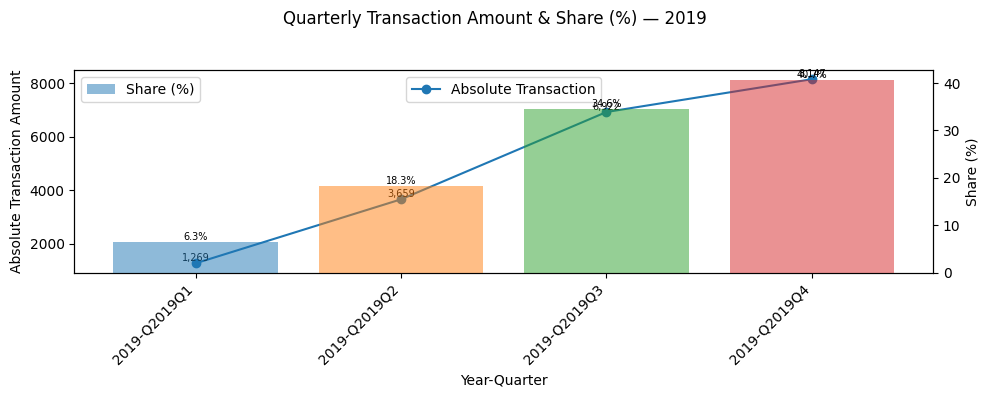

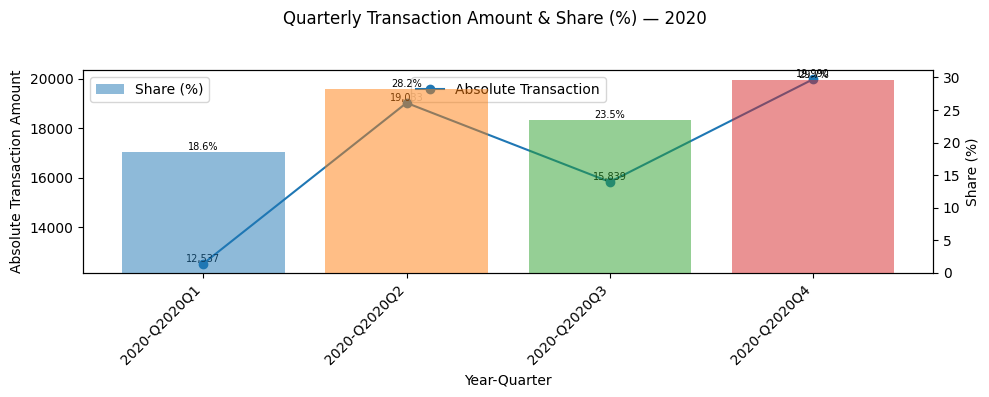

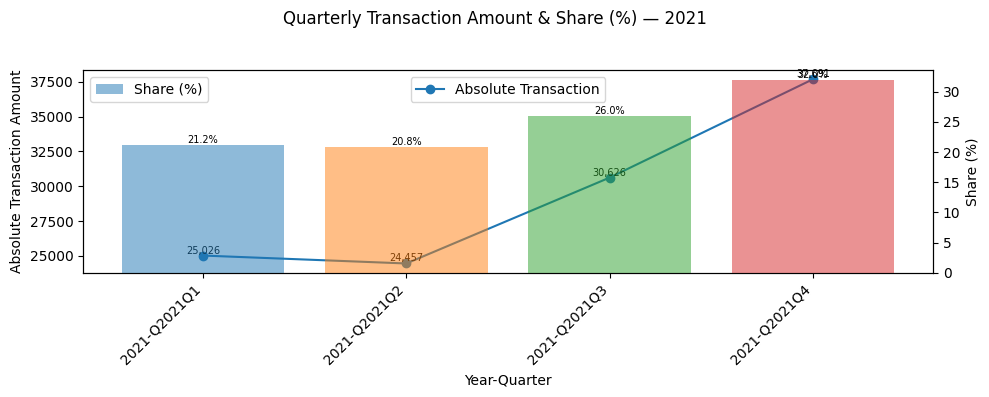

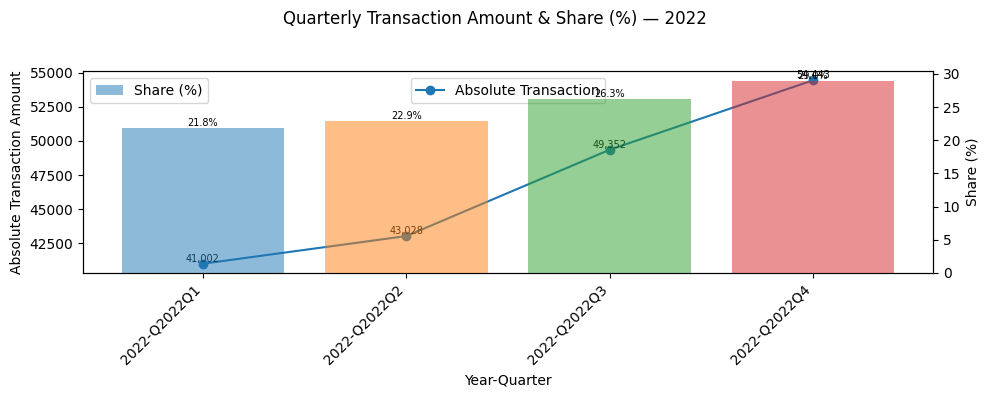

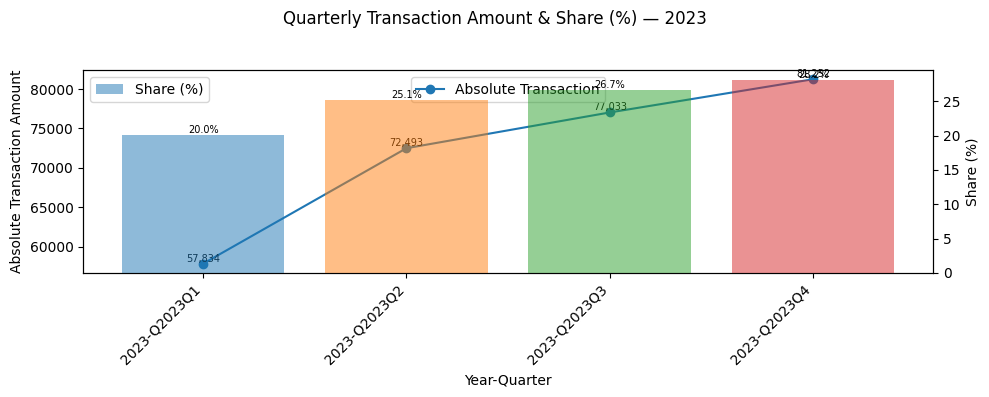

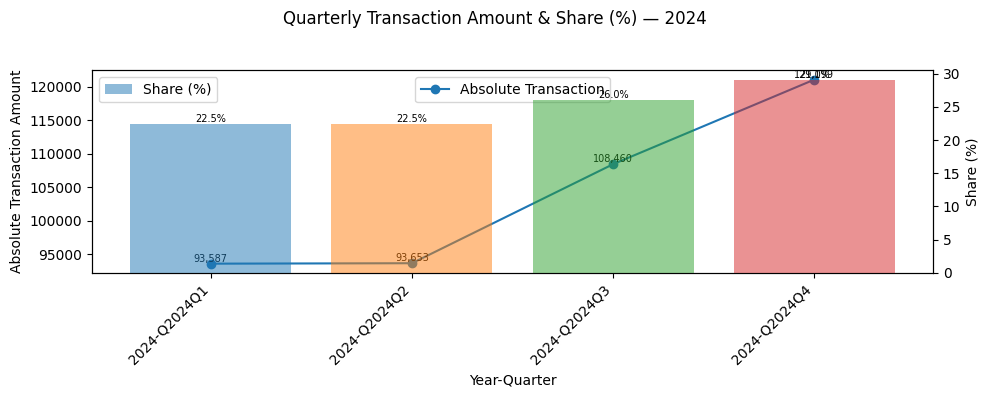

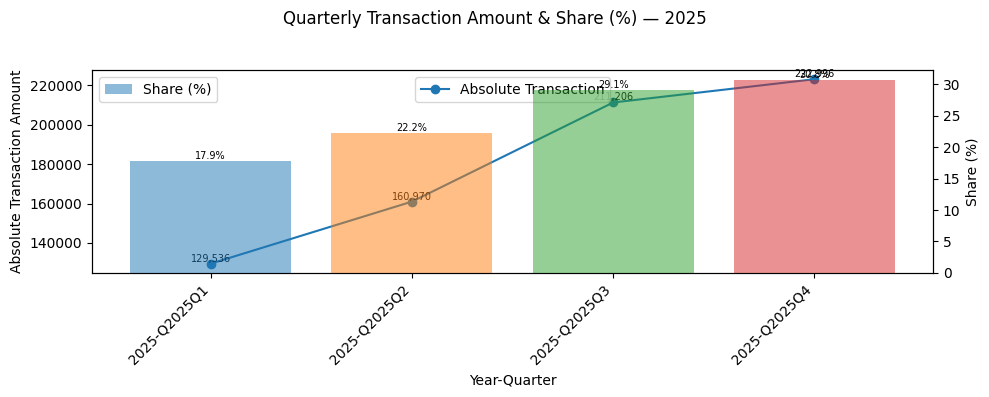

In [ ]:
trx_amount = (
    df_valid_trx
    .groupby(['year', 'Quarter'])['total_transaction_amount']
    .sum()
    .sort_index()
)

years = trx_amount.index.get_level_values(0).unique().tolist()

import matplotlib.pyplot as plt

for year in years:
    yearly_data = trx_amount.loc[year]
    total_year_amount = yearly_data.sum()
    share_pct = yearly_data / total_year_amount * 100
    quarter_labels = [f"{year}-Q{q}" for q in yearly_data.index.tolist()]
    absolute_values = yearly_data.values.tolist()
    share_values = share_pct.values.tolist()
    fig, ax1 = plt.subplots(figsize=(10, 4))

    ax1.plot(quarter_labels, absolute_values, marker='o', label='Absolute Transaction')
    for x, y in zip(quarter_labels, absolute_values):
        ax1.text(x, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=7)

    ax1.set_xlabel("Year-Quarter")
    ax1.set_ylabel("Absolute Transaction Amount")
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    for x, y in zip(quarter_labels, share_values):
        ax2.bar(x, y, alpha=0.5)
        ax2.text(x, y, f"{y:.1f}%", ha='center', va='bottom', fontsize=7)

    ax2.set_ylabel("Share (%)")
    ax2.tick_params(axis='y')

    fig.suptitle(f"Quarterly Transaction Amount & Share (%) — {year}")
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

    ax1.legend(loc='upper center')
    ax2.legend(["Share (%)"], loc='upper left')

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [ ]:
df_valid_trx['month'] = pd.to_datetime(df_valid_trx['created_at']).dt.month
trx_amount = df_valid_trx.groupby(['year','month'])['total_transaction_amount'].sum().sort_index()

In [ ]:
trx_amount = trx_amount.to_frame(name='total_transaction_amount')

trx_amount['MoM'] = trx_amount.groupby(level=0)['total_transaction_amount'].pct_change() * 100


In [ ]:
import calendar

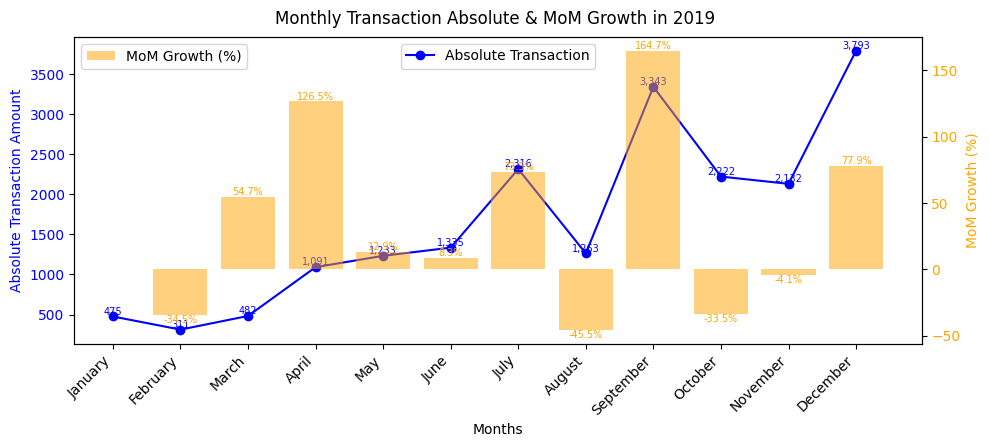

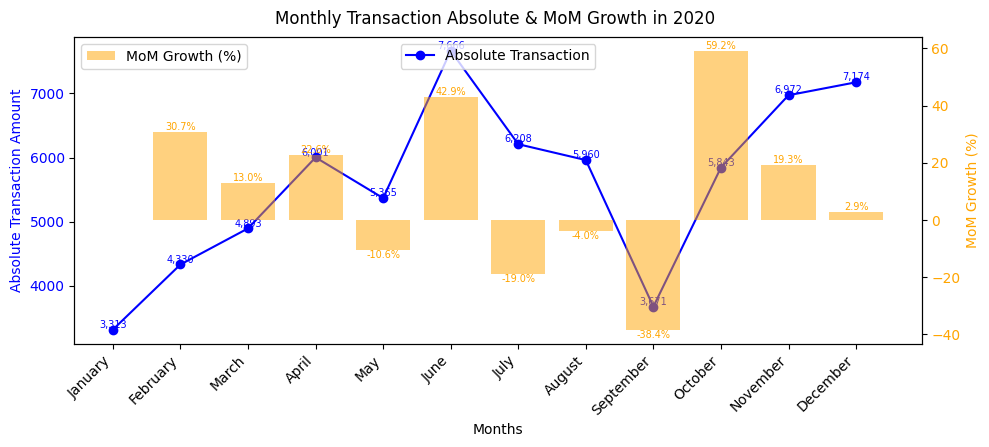

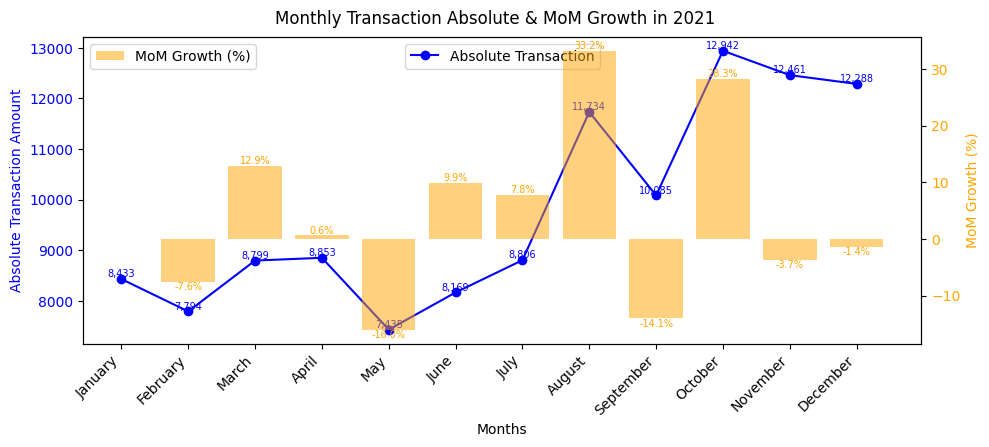

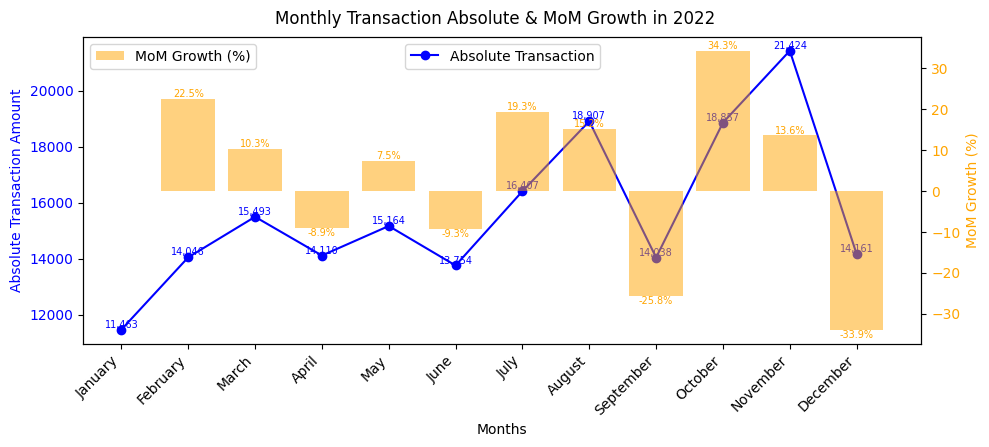

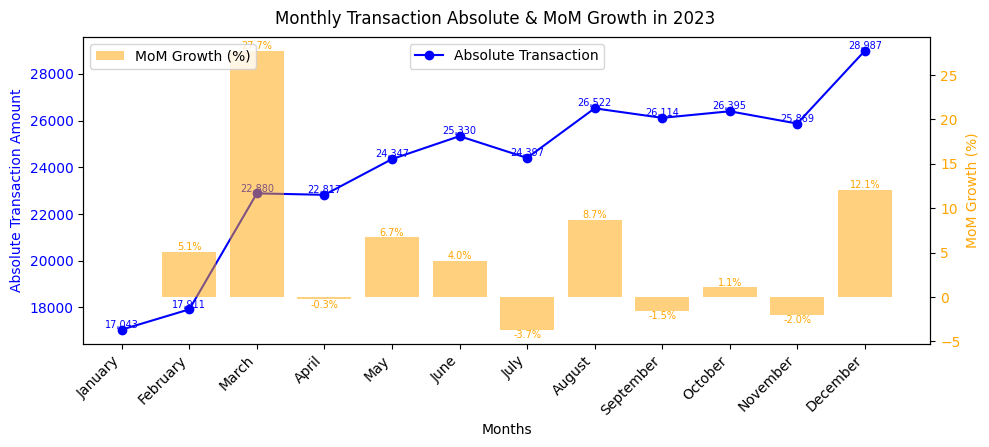

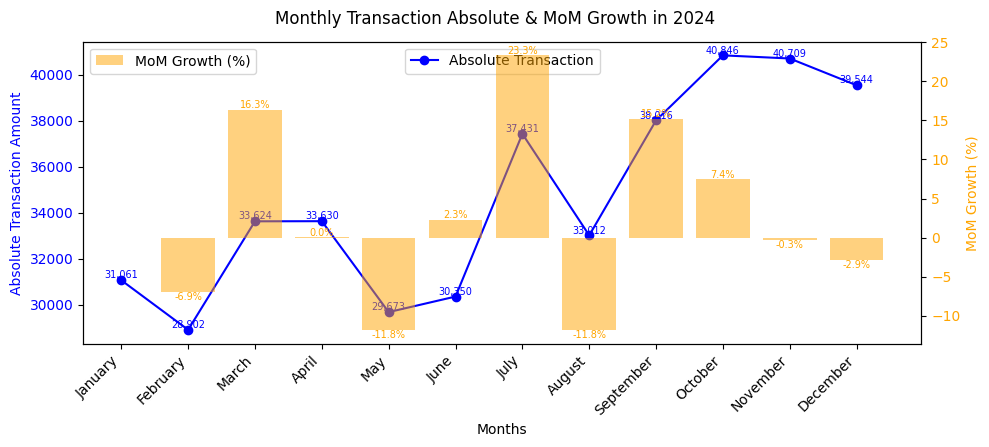

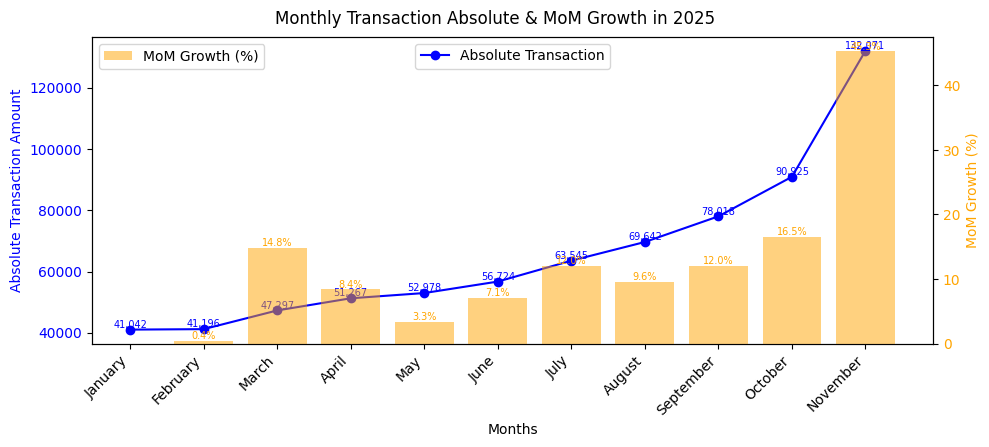

In [ ]:
years = trx_amount.index.get_level_values(0).unique().tolist()

for year in years:

  absolute = trx_amount.loc[year]['total_transaction_amount'].values.tolist()
  mom = trx_amount.loc[year]['MoM'].values.tolist()
  month_numbers = trx_amount.loc[year].index.get_level_values(0).unique().tolist()
  months = [calendar.month_name[m] for m in month_numbers]
  fig, ax1 = plt.subplots(figsize=(10, 4))
  ax1.plot(months, absolute, marker='o', color='blue', label='Absolute Transaction')
  for x, y in zip(months, absolute):
      ax1.text(x, y, f'{y:,.0f}', ha='center', va='bottom', color='blue', fontsize=7)

  ax1.set_xlabel('Months')
  ax1.set_ylabel('Absolute Transaction Amount', color='blue')
  ax1.tick_params(axis='y', labelcolor='blue')

  ax2 = ax1.twinx()
  for x, y in zip(months[1:], mom[1:]):
      ax2.bar(x, y, color='orange', alpha=0.5)
      va = 'bottom' if y >= 0 else 'top'
      ax2.text(x, y, f'{y:.1f}%', ha='center', va=va, color='orange', fontsize=7)

  ax2.set_ylabel('MoM Growth (%)', color='orange')
  ax2.tick_params(axis='y', labelcolor='orange')

  fig.tight_layout(rect=[0, 0, 1, 0.95])
  fig.suptitle('Monthly Transaction Absolute & MoM Growth in '+str(year))
  ax1.legend(loc='upper center')
  ax2.legend(['MoM Growth (%)'], loc='upper left')
  plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

  plt.show()


calculating ratio between transaction amount and total profit

In [ ]:
total_amount = df_valid_trx['total_transaction_amount'].sum()
total_profit = df_valid_trx['total_profit'].sum()

margin_rate = float(round(total_profit / total_amount,4))

In [ ]:
margin_rate

0.0374

In [ ]:
last_date = df_valid_trx['created_at'].max()

In [ ]:
last_date

Timestamp('2025-11-30 00:00:00')

In [ ]:
df_valid_trx = df_valid_trx[
    (df_valid_trx['created_at'] >= '2025-01-01') &
    (df_valid_trx['created_at'] <  '2025-12-01')
].reset_index(drop=True)


In [ ]:
df_valid_trx['created_at'].describe()

,created_at
count,11105
mean,2025-07-18 14:23:13.318324992
min,2025-01-01 00:00:00
25%,2025-04-30 00:00:00
50%,2025-08-02 00:00:00
75%,2025-10-14 00:00:00
max,2025-11-30 00:00:00


In [ ]:
df_rfm = summary_data_from_transaction_data(
    df_valid_trx,
    customer_id_col='id',
    datetime_col='created_at',
    monetary_value_col='total_transaction_amount',
    freq="D",
    observation_period_end=last_date
)

In [ ]:
df_rfm.head()

,frequency,recency,T,monetary_value
id,,,,
2,0.0,0.0,79.0,0.00
26,0.0,0.0,21.0,0.00
29,1.0,1.0,292.0,14.95
36,0.0,0.0,186.0,0.00
42,0.0,0.0,224.0,0.00


In [ ]:
print(len(df_rfm),len(df_valid_trx))

7868 11105


In [ ]:
df_rfm[['frequency','recency','T']].describe()
df_rfm.frequency.value_counts().sort_index()


,count
frequency,
0.0,5524
1.0,1644
2.0,543
3.0,133
4.0,17
5.0,3
6.0,3
7.0,1


In [ ]:
bgf = BetaGeoFitter(penalizer_coef=0.5)
bgf.fit(df_rfm['frequency'], df_rfm['recency'], df_rfm['T'])

print("Parameter Model BG/NBD")
print(bgf.summary)
print("-" * 50)

Parameter Model BG/NBD
           coef  se(coef)  lower 95% bound  upper 95% bound
r      0.072287  0.001733         0.068891         0.075683
alpha  0.579109  0.033280         0.513881         0.644337
a      0.201073  0.007170         0.187020         0.215126
b      0.084781  0.004247         0.076458         0.093104
--------------------------------------------------


In [ ]:
t = 30
df_rfm['Predicted_Purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t,
    df_rfm['frequency'],
    df_rfm['recency'],
    df_rfm['T']
)

In [ ]:
returning_cust_df = df_rfm[df_rfm['frequency'] > 0]

if len(returning_cust_df) > 0:
    ggf = GammaGammaFitter(penalizer_coef=0.0)
    ggf.fit(
        returning_cust_df['frequency'],
        returning_cust_df['monetary_value']
    )

    print("Parameter Model Gamma-Gamma")
    print(ggf.summary)
    print("-" * 50)

Parameter Model Gamma-Gamma
        coef  se(coef)  lower 95% bound  upper 95% bound
p   3.108670  0.229400         2.659045         3.558295
q   3.541211  0.240868         3.069109         4.013313
v  55.653635  8.310146        39.365748        71.941521
--------------------------------------------------


In [ ]:
df_rfm['Predicted_Monetary'] = ggf.conditional_expected_average_profit(
        df_rfm['frequency'],
        df_rfm['monetary_value']
    )

In [ ]:
df_rfm.head()

,frequency,recency,T,monetary_value,Predicted_Purchases,Predicted_Monetary
id,,,,,,
2,0.0,0.0,79.0,0.00,0.024116,68.081234
26,0.0,0.0,21.0,0.00,0.071630,68.081234
29,1.0,1.0,292.0,14.95,0.000169,38.847437
36,0.0,0.0,186.0,0.00,0.010984,68.081234
42,0.0,0.0,224.0,0.00,0.009208,68.081234


In [ ]:
discount_rate_monthly = 0.01
daily_discount_rate = (1 + discount_rate_monthly)**(1/30) - 1

cltv_df = ggf.customer_lifetime_value(
        bgf,
        df_rfm['frequency'],
        df_rfm['recency'],
        df_rfm['T'],
        df_rfm['monetary_value'],
        time=t,
        freq='D',
        discount_rate=daily_discount_rate
    )

df_rfm = df_rfm.merge(cltv_df.drop(columns='predicted_purchases'), left_index=True, right_index=True)

print(f"Hasil Prediksi CLTV (untuk {t} hari ke depan)")
print(df_rfm[['frequency', 'monetary_value', 'Predicted_Purchases', 'Predicted_Monetary', 'clv']].sort_values(by='clv', ascending=False))

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Hasil Prediksi CLTV (untuk 30 hari ke depan)
       frequency  monetary_value  Predicted_Purchases  Predicted_Monetary  \
id                                                                          
3112         2.0         217.055            13.624301          173.831666   
2410         2.0          73.840            13.624301           72.169148   
8264         1.0         999.000             1.588191          580.290111   
55946        2.0         124.000             6.183045          107.775697   
12876        2.0          72.490             8.979424           71.210838   
...          ...             ...                  ...                 ...   
68229        0.0           0.000             0.152471           68.081234   
68295        0.0           0.000             0.167835           68.081234   
68309        0.0           0.000             0.429009           68.081234   
68395        0.0           0.000             0.187466           68.081234   
68596        0.0           0.00

In [ ]:
df_rfm[['frequency', 'monetary_value', 'Predicted_Purchases', 'Predicted_Monetary', 'clv']].sort_values(by='clv', ascending=False)

,frequency,monetary_value,Predicted_Purchases,Predicted_Monetary,clv
id,,,,,
3112,2.0,217.055,13.624301,173.831666,37561.882266
2410,2.0,73.840,13.624301,72.169148,15594.449062
8264,1.0,999.000,1.588191,580.290111,14364.997560
55946,2.0,124.000,6.183045,107.775697,10816.820837
12876,2.0,72.490,8.979424,71.210838,10266.783872
...,...,...,...,...,...
68229,0.0,0.000,0.152471,68.081234,NaN
68295,0.0,0.000,0.167835,68.081234,NaN
68309,0.0,0.000,0.429009,68.081234,NaN


In [ ]:
df_rfm[df_rfm['clv'].isnull()].describe()


,frequency,recency,T,monetary_value,Predicted_Purchases,Predicted_Monetary,clv
count,651.0,651.0,651.000000,651.0,651.000000,6.510000e+02,0.0
mean,0.0,0.0,5.142857,0.0,0.349054,6.808123e+01,NaN
std,0.0,0.0,4.743857,0.0,0.279637,1.422178e-14,NaN
min,0.0,0.0,0.000000,0.0,0.091550,6.808123e+01,NaN
25%,0.0,0.0,1.000000,0.0,0.129728,6.808123e+01,NaN
50%,0.0,0.0,4.000000,0.0,0.213725,6.808123e+01,NaN
75%,0.0,0.0,9.000000,0.0,0.429009,6.808123e+01,NaN
max,0.0,0.0,15.000000,0.0,0.840621,6.808123e+01,NaN


In [ ]:
df_rfm[df_rfm['clv'].notnull() & (df_rfm['frequency'] == 0)].describe()


,frequency,recency,T,monetary_value,Predicted_Purchases,Predicted_Monetary,clv
count,4873.0,4873.0,4873.000000,4873.0,4873.000000,4.873000e+03,4873.000000
mean,0.0,0.0,154.767289,0.0,0.021012,6.808123e+01,18.099055
std,0.0,0.0,92.825029,0.0,0.017538,4.761125e-12,11.051096
min,0.0,0.0,16.000000,0.0,0.006293,6.808123e+01,7.917799
25%,0.0,0.0,72.000000,0.0,0.008869,6.808123e+01,10.146863
50%,0.0,0.0,146.000000,0.0,0.013784,6.808123e+01,13.880498
75%,0.0,0.0,233.000000,0.0,0.026177,6.808123e+01,22.003254
max,0.0,0.0,333.000000,0.0,0.087428,6.808123e+01,58.856483


In [ ]:
df_rfm[df_rfm['clv'].notnull() & (df_rfm['frequency'] > 0)].describe()

,frequency,recency,T,monetary_value,Predicted_Purchases,Predicted_Monetary,clv
count,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000
mean,1.380973,23.139932,143.168942,68.525971,0.199345,68.294812,237.767101
std,0.668412,52.166826,96.774302,74.907284,0.930660,43.565229,1223.087245
min,1.000000,1.000000,1.000000,1.500000,0.000003,24.509187,0.003150
25%,1.000000,2.000000,57.000000,28.807499,0.000623,44.377135,0.858551
50%,1.000000,3.000000,134.500000,48.644167,0.004281,55.984353,5.505055
75%,2.000000,4.000000,225.000000,83.599998,0.047713,77.572953,57.670469
max,7.000000,300.000000,333.000000,999.000000,13.663079,580.290111,37561.882266


Predicting profit from CLTV result

In [ ]:
df_rfm['predicted_trx_amount'] = (df_rfm['Predicted_Purchases'] * df_rfm['Predicted_Monetary'])

In [ ]:
df_rfm['predicted_profit'] = (df_rfm['predicted_trx_amount'] * margin_rate)

In [ ]:
repeat_buyer = df_rfm[df_rfm['clv'].notnull() & (df_rfm['frequency'] > 0)].reset_index(drop=True)

predicted_profit_all = df_rfm['predicted_profit'].sum().round(2)
predicted_profit_repeat_buyer = repeat_buyer['predicted_profit'].sum().round(2)


In [ ]:
print("Predicted profit from all customers over the next 30 days is around $"+str(predicted_profit_all))

Predicted profit from all customers over the next 30 days is around $2028.19


In [ ]:
print("Predicted profit from repeated buyers over the next 30 days is around $"+str(predicted_profit_repeat_buyer))

Predicted profit from repeated buyers over the next 30 days is around $1188.88


In [ ]:

# repeat_buyer['badge'] = pd.qcut(repeat_buyer['clv'], 4, labels=['at risk', 'low value', 'medium value', 'high value'])

repeat_buyer['percentile'] = repeat_buyer['clv'].rank(pct=True)

def assign_badge(p):
    if p >= 0.95:
        return "Platinum"
    elif p >= 0.75:
        return "Gold"
    elif p >= 0.40:
        return "Silver"
    else:
        return "Bronze"

repeat_buyer['badge'] = repeat_buyer['percentile'].apply(assign_badge)

In [ ]:
repeat_buyer['badge'].value_counts()

,count
badge,
Bronze,937
Silver,820
Gold,469
Platinum,118


Combine actual data and CLTV prediction (over 30 days)

In [ ]:
december_prediction = round(float(df_rfm['predicted_trx_amount'].sum()),2)

In [ ]:
import calendar
import matplotlib.pyplot as plt

def visDecember(december_prediction,title):
  year = 2025

  absolute = trx_amount.loc[year]['total_transaction_amount'].values.tolist()
  mom = trx_amount.loc[year]['MoM'].values.tolist()
  month_numbers = trx_amount.loc[year].index.get_level_values(0).unique().tolist()
  months = [calendar.month_name[m] for m in month_numbers]

  december_value = december_prediction
  december_mom = ((december_value - absolute[-1]) / absolute[-1]) * 100

  absolute_pred = absolute + [december_value]
  mom_pred = mom + [december_mom]
  months_pred = months + ["December"]

  fig, ax1 = plt.subplots(figsize=(10, 4))

  ax1.plot(months, absolute, marker='o', color='blue', label='Actual')

  ax1.plot(["November", "December"], [absolute[-1], december_value],
          linestyle='--', marker='o', color='red', label='Predicted')

  for x, y in zip(months, absolute):
      ax1.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=7, color='blue')

  ax1.text("December", december_value, f'{december_value:,.0f}',
          ha='center', va='bottom', fontsize=7, color='red')

  ax1.set_xlabel('Months')
  ax1.set_ylabel('Absolute Transaction Amount')
  ax1.tick_params(axis='y')

  ax2 = ax1.twinx()

  for x, y in zip(months[1:], mom[1:]):
      ax2.bar(x, y, alpha=0.5, color='orange')

  ax2.bar("December", december_mom, alpha=0.7, color='red')

  for x, y in zip(months[1:], mom[1:]):
      ax2.text(x, y, f'{y:.1f}%',
              ha='center', va='bottom' if y >= 0 else 'top', fontsize=7, color='orange')

  ax2.text("December", december_mom, f'{december_mom:.1f}%',
          ha='center', va='top', fontsize=7, color='black')

  ax2.set_ylabel('MoM Growth (%)')
  ax2.tick_params(axis='y')

  fig.suptitle(f'{title}')
  fig.tight_layout(rect=[0, 0, 1, 0.95])

  ax1.legend(loc='upper center')
  ax2.legend(['MoM Growth (%)', 'Predicted MoM'], loc='upper left')

  plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
  plt.show()


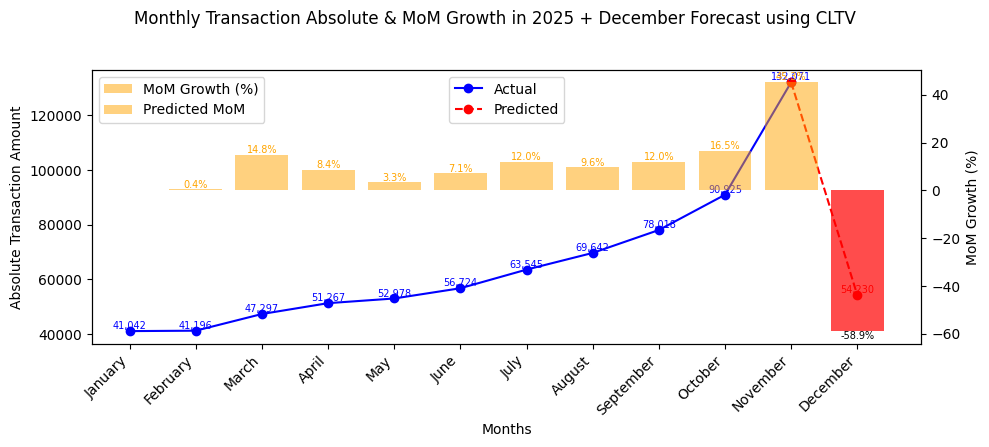

In [ ]:
visDecember(december_prediction,"Monthly Transaction Absolute & MoM Growth in 2025 + December Forecast using CLTV")

In [ ]:
df_rfm.columns

Index(['frequency', 'recency', 'T', 'monetary_value', 'Predicted_Purchases',
       'Predicted_Monetary', 'clv', 'predicted_trx_amount',
       'predicted_profit'],
      dtype='object')

In [ ]:
df_valid_trx2 = df_valid_trx.copy()

Because CLTV approach isn't focusing in overall sales forecast data instead it focuses on the individual purchasing probability, we try to forecast with machine learning algorithm. The result will be our upper goal to achieve

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
df = df.drop(columns=['id','status','year','total_profit'])
df = df.groupby(['created_at']).sum().reset_index()
df = df.sort_values('created_at')
df = df[df['created_at'] < '2025-12-01']
df = df.reset_index(drop=True)
df.head()

,created_at,total_transaction_amount
0,2019-01-03,208.000000
1,2019-01-17,88.500000
2,2019-01-19,35.990002
3,2019-01-21,109.910004
4,2019-01-23,43.990002


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


In [ ]:
data = df['total_transaction_amount'].values.reshape(-1, 1)


Text(0.5, 1.0, 'Distribution of Total Transaction Amount')

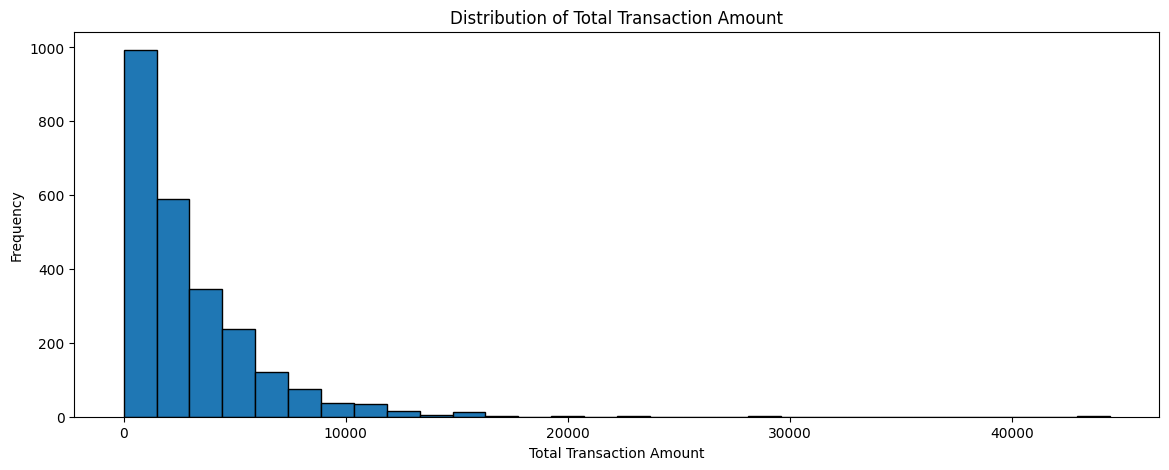

In [ ]:
plt.figure(figsize=(14,5))
plt.hist(df['total_transaction_amount'],bins=30,edgecolor='black')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Total Transaction Amount')

In [ ]:
upper = np.quantile(data, 0.99)
data_clipped = np.minimum(data, upper)

data_log = np.log1p(data_clipped)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_log.reshape(-1, 1))


In [ ]:
window = 30

X = []
y = []

for i in range(window, len(data_scaled)):
    X.append(data_scaled[i-window:i])
    y.append(data_scaled[i])

X = np.array(X)
y = np.array(y)


In [ ]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=False, input_shape=(window, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=16,
    verbose=1
)


Epoch 1/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0976 - val_loss: 0.0032
Epoch 2/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0040 - val_loss: 3.9455e-04
Epoch 3/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0034 - val_loss: 8.9447e-04
Epoch 4/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0038 - val_loss: 6.3965e-04
Epoch 5/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0038 - val_loss: 9.2517e-04
Epoch 6/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0044 - val_loss: 3.8260e-04
Epoch 7/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 8/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0038 - val_loss: 6.2986e-04
Epoch 9/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 10/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0038 - val_loss: 8.4056e-04
Epoch 11/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0041 - val_loss: 4.0640e-04
Epoch 12/

In [ ]:
forecast = []

window_data = data_scaled[-window:].reshape(1, window, 1)

for _ in range(30):
    pred_scaled = model.predict(window_data)
    pred_log = scaler.inverse_transform(pred_scaled)[0][0]
    pred_value = np.expm1(pred_log)
    forecast.append(pred_value)
    pred_scaled_for_window = pred_scaled.reshape(1,1,1)
    window_data = np.concatenate([window_data[:,1:,:], pred_scaled_for_window], axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━

In [ ]:
print(forecast)


[np.float32(12217.896), np.float32(12114.637), np.float32(12008.492), np.float32(11902.268), np.float32(11800.369), np.float32(11702.055), np.float32(11606.043), np.float32(11513.839), np.float32(11424.534), np.float32(11337.404), np.float32(11252.592), np.float32(11169.872), np.float32(11089.029), np.float32(11009.886), np.float32(10932.37), np.float32(10856.373), np.float32(10781.84), np.float32(10708.677), np.float32(10636.862), np.float32(10566.426), np.float32(10497.237), np.float32(10429.326), np.float32(10362.646), np.float32(10297.158), np.float32(10232.874), np.float32(10169.748), np.float32(10107.773), np.float32(10046.933), np.float32(9987.202), np.float32(9928.573)]


In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred_log = scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
y_pred_real = np.expm1(y_pred_log)

y_test_log = scaler.inverse_transform(y_test.reshape(-1,1))
y_test_real = np.expm1(y_test_log)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
mae = mean_absolute_error(y_test_real, y_pred_real)

print("RMSE:", rmse)
print("MAE :", mae)


RMSE: 1050.666720803241
MAE : 837.5291652039061


In [ ]:
mape = np.mean(np.abs((y_test_real - y_pred_real) / y_test_real)) * 100
print("MAPE:", mape, "%")


MAPE: 11.85473346442806 %


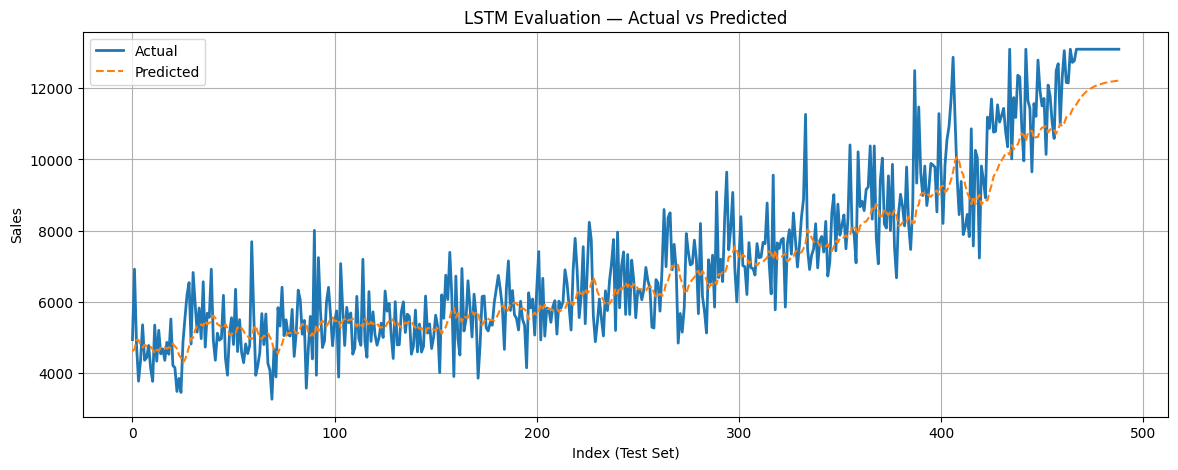

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test_real, label='Actual', linewidth=2)
plt.plot(y_pred_real, label='Predicted', linestyle='dashed')
plt.title('LSTM Evaluation — Actual vs Predicted')
plt.xlabel('Index (Test Set)')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
december_prediction = round(float(sum(forecast)),2)

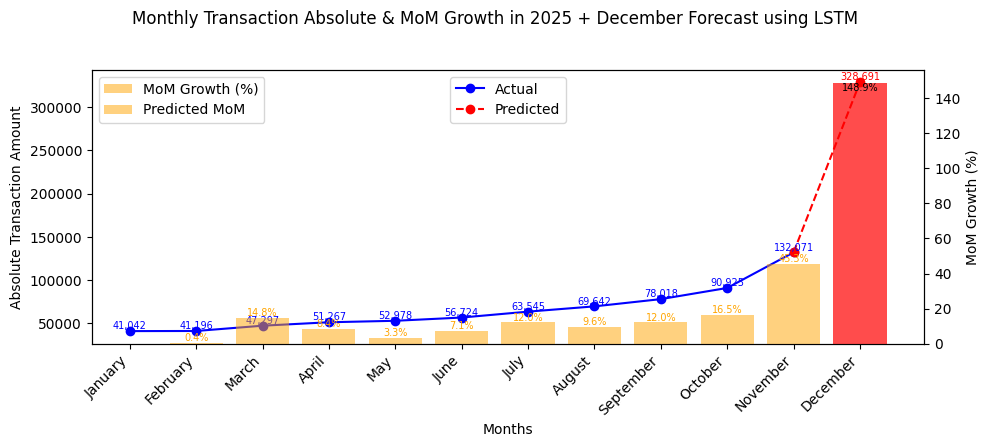

In [ ]:
visDecember(december_prediction,"Monthly Transaction Absolute & MoM Growth in 2025 + December Forecast using LSTM")

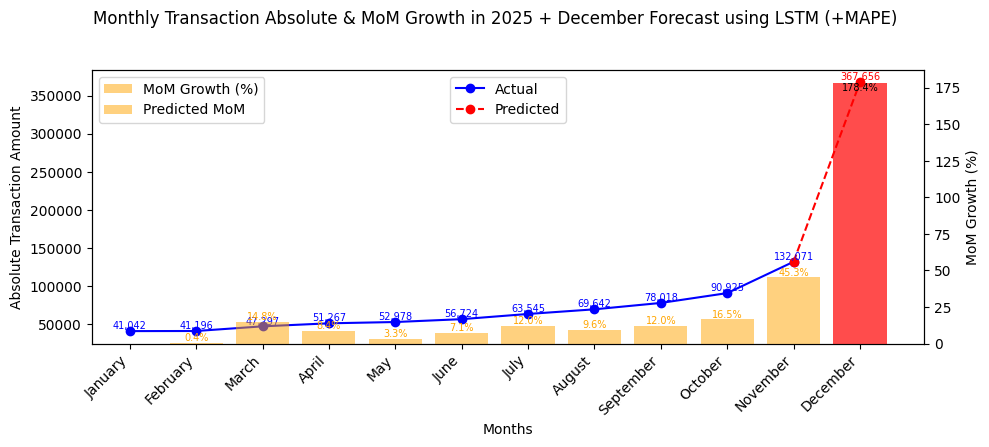

In [ ]:
val = december_prediction+(december_prediction*mape/100)
visDecember(val,"Monthly Transaction Absolute & MoM Growth in 2025 + December Forecast using LSTM (+MAPE)")

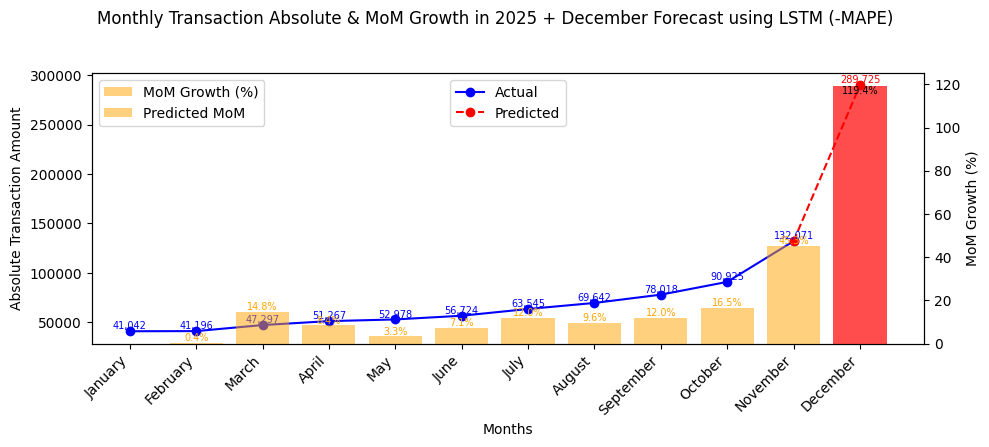

In [ ]:
val = december_prediction-(december_prediction*mape/100)
visDecember(val,"Monthly Transaction Absolute & MoM Growth in 2025 + December Forecast using LSTM (-MAPE)")

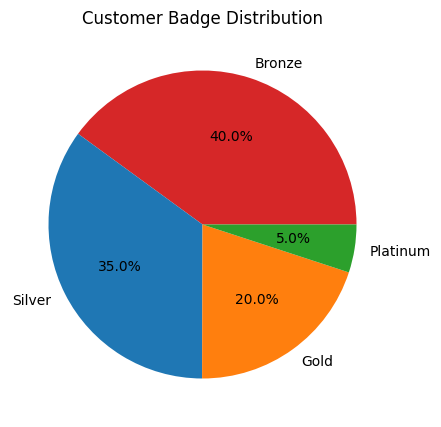

In [ ]:
colors = ["#d62728","#1f77b4", "#ff7f0e", "#2ca02c"]

plt.figure(figsize=(5,5))
plt.pie(
    repeat_buyer['badge'].value_counts(),
    labels=repeat_buyer['badge'].value_counts().index,
    autopct='%1.1f%%',
    colors=colors
)
plt.title('Customer Badge Distribution')
plt.show()


In [ ]:
badge = repeat_buyer['badge'].unique().tolist()

for b in badge:
    print(f"{b} Badge Description:")
    print(repeat_buyer[repeat_buyer['badge'] == b].describe())
    print("\n" + "="*50 + "\n")


Bronze Badge Description:
        frequency     recency           T  monetary_value  \
count  937.000000  937.000000  937.000000      937.000000   
mean     1.309498    2.289221  213.268943       57.922009   
std      0.562585    1.772481   65.756790       48.945180   
min      1.000000    1.000000   61.000000        1.500000   
25%      1.000000    1.000000  162.000000       26.510000   
50%      1.000000    2.000000  211.000000       42.500000   
75%      2.000000    3.000000  267.000000       71.250000   
max      4.000000   25.000000  333.000000      420.000000   

       Predicted_Purchases  Predicted_Monetary         clv  \
count           937.000000          937.000000  937.000000   
mean              0.000628           62.058496    0.798227   
std               0.000519           28.368898    0.566696   
min               0.000003           27.561582    0.003150   
25%               0.000247           43.848925    0.345153   
50%               0.000473           53.114608    0.

In [ ]:
repeat_buyer

,frequency,recency,T,monetary_value,Predicted_Purchases,Predicted_Monetary,clv,predicted_trx_amount,predicted_profit,percentile,badge
0,1.0,1.0,292.0,14.950000,0.000169,38.847437,0.156204,0.006549,0.000245,0.029437,Bronze
1,2.0,2.0,81.0,31.810000,0.003053,42.333757,2.723050,0.129241,0.004834,0.421075,Silver
2,1.0,2.0,16.0,10.150000,0.088381,36.206388,54.633015,3.199946,0.119678,0.742321,Silver
3,1.0,3.0,11.0,99.500000,0.238934,85.368425,339.268816,20.397421,0.762864,0.890358,Gold
4,2.0,98.0,233.0,26.475000,0.124220,38.546657,114.675262,4.788270,0.179081,0.809300,Gold
...,...,...,...,...,...,...,...,...,...,...,...
2339,2.0,4.0,5.0,82.355000,6.569302,78.213601,8423.149562,513.808803,19.216449,0.995734,Platinum
2340,1.0,2.0,44.0,94.989998,0.012900,82.886938,20.112265,1.069241,0.039990,0.629266,Silver
2341,2.0,3.0,88.0,477.500000,0.004676,358.711002,35.704867,1.677365,0.062733,0.694966,Silver
2342,2.0,19.0,238.0,25.000000,0.007547,37.499614,6.794221,0.283008,0.010584,0.525171,Silver


Repeat Buyer Visualization and Analysis

In [ ]:
feature = repeat_buyer.columns.tolist()
feature.remove('badge')

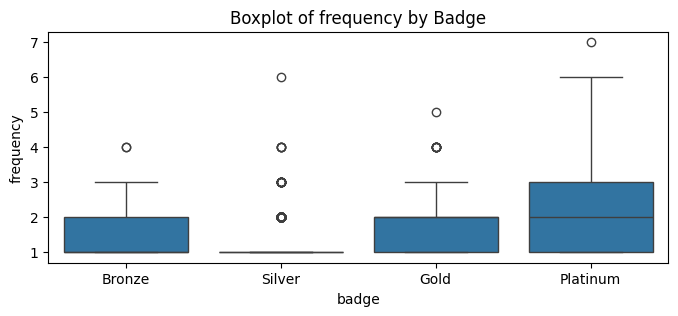

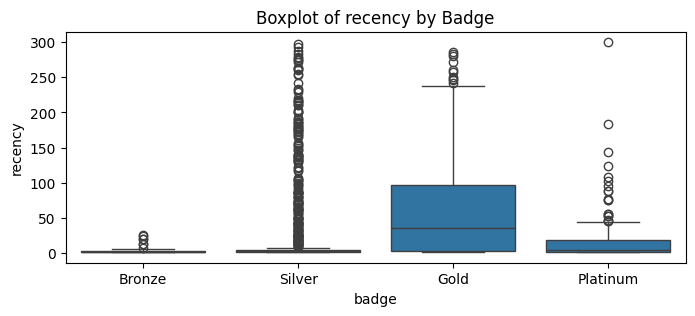

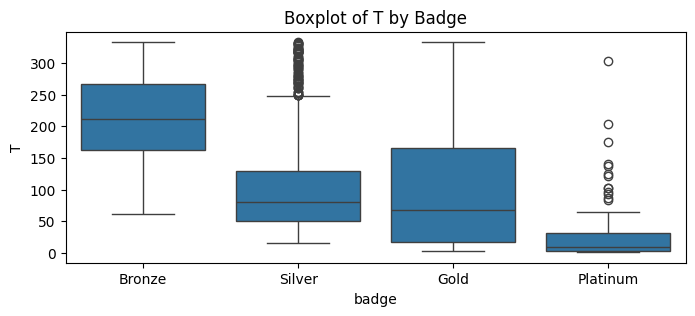

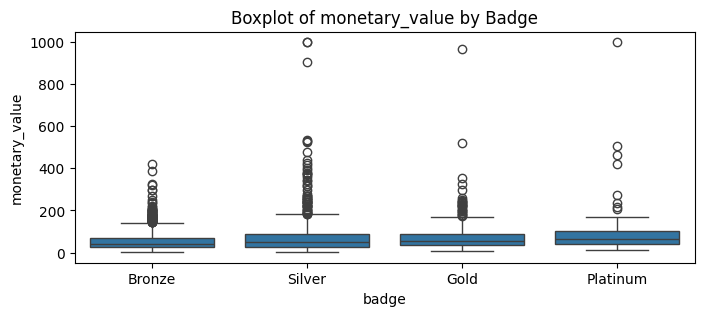

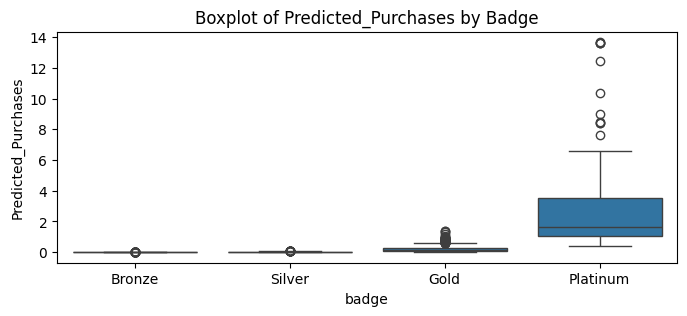

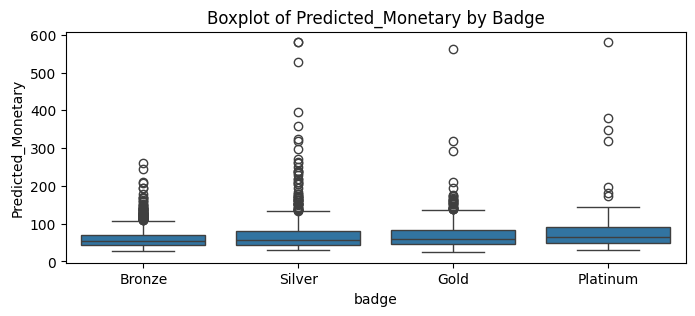

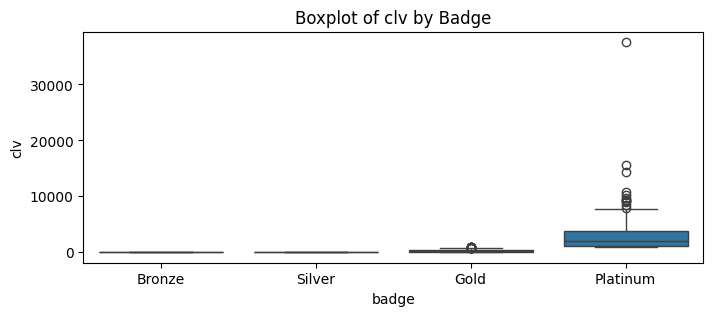

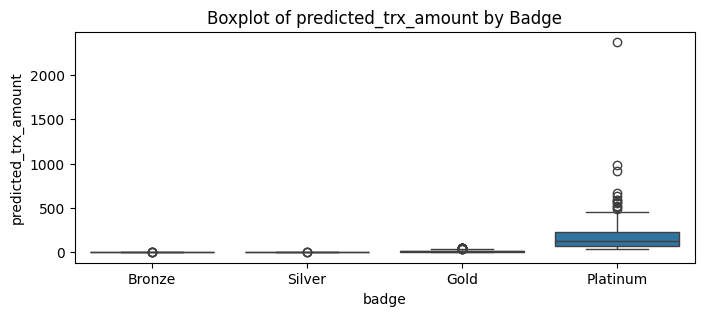

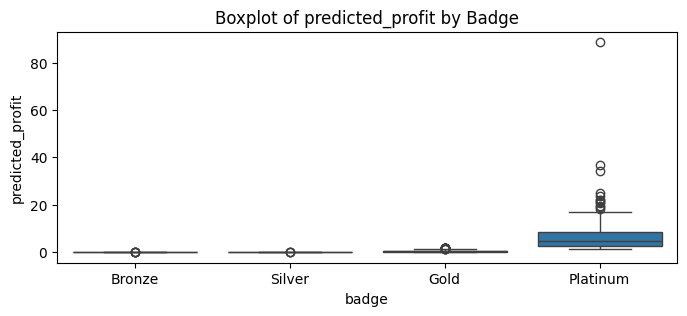

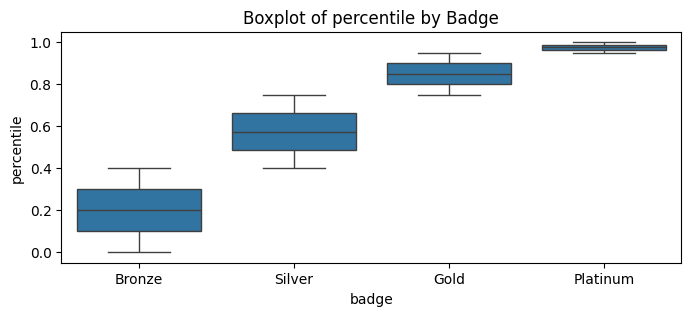

In [ ]:
for f in feature:
  plt.figure(figsize=(8,3))
  sns.boxplot(x='badge', y=f, data=repeat_buyer)
  plt.title(f'Boxplot of {f} by Badge')
  plt.show()

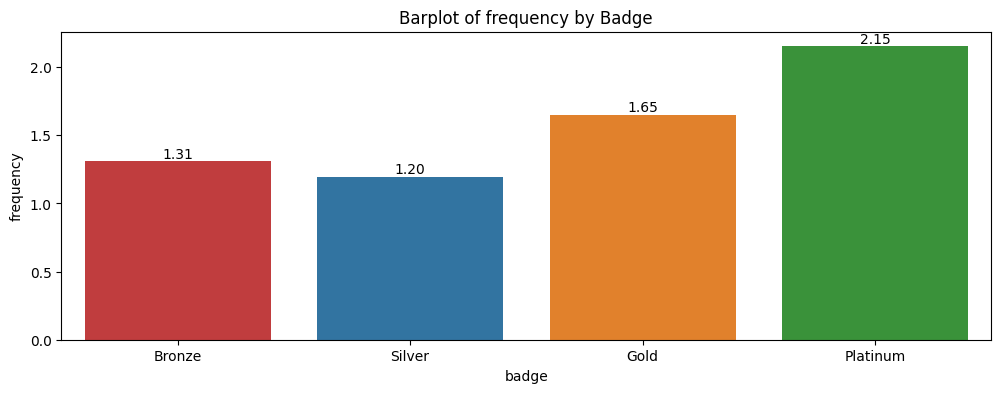

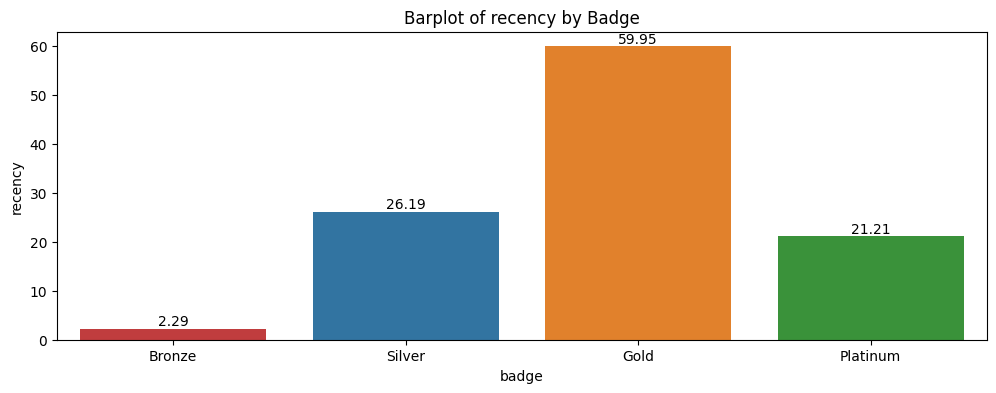

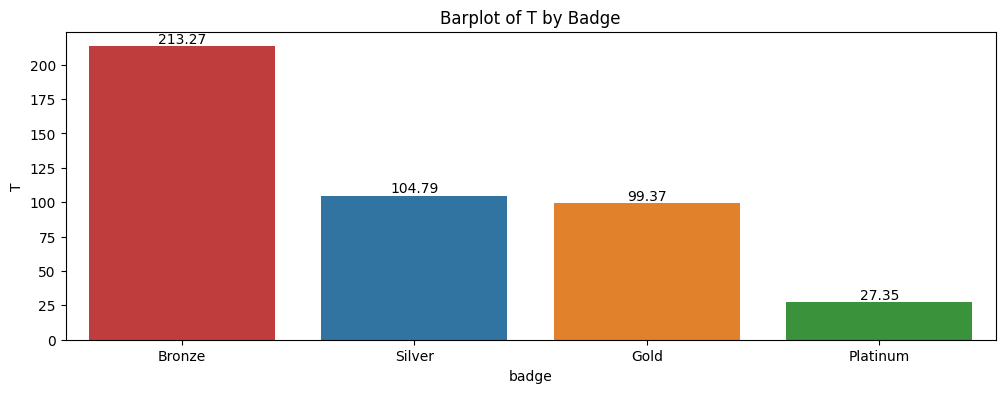

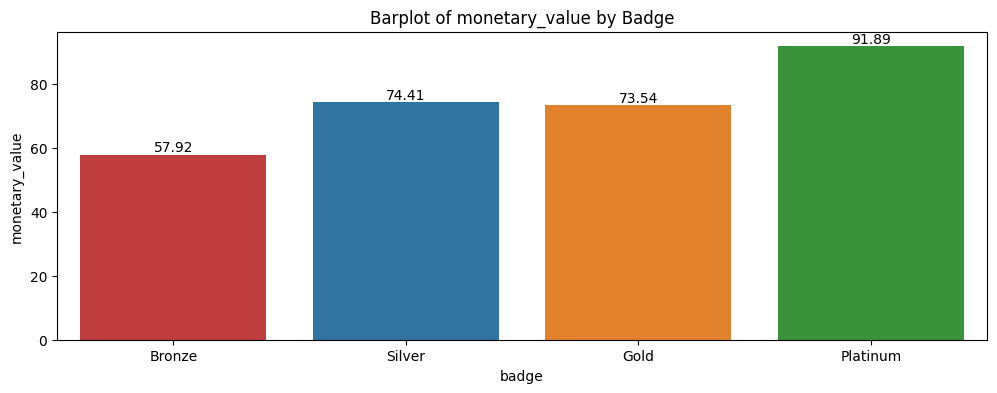

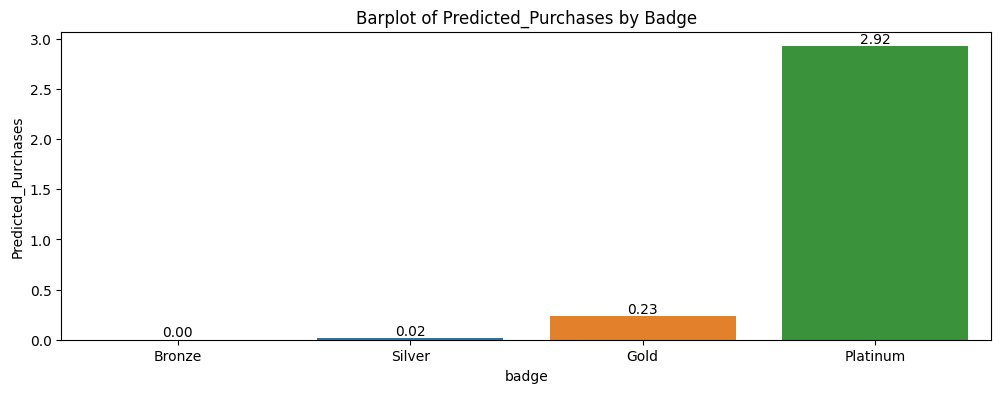

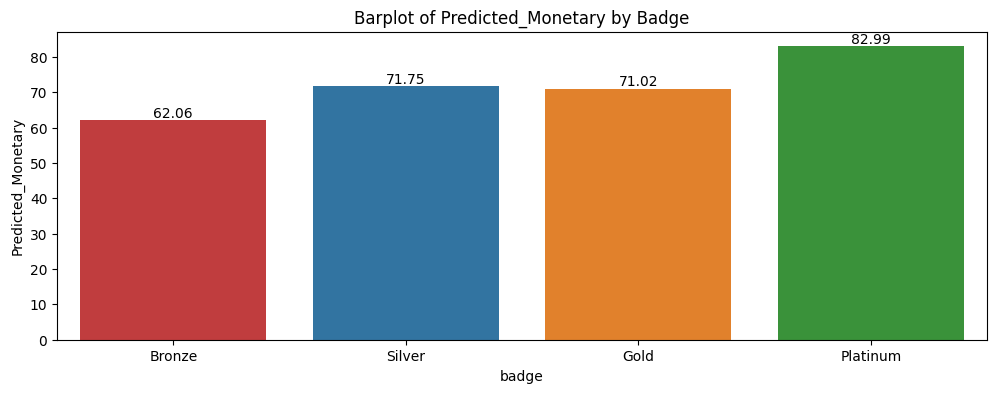

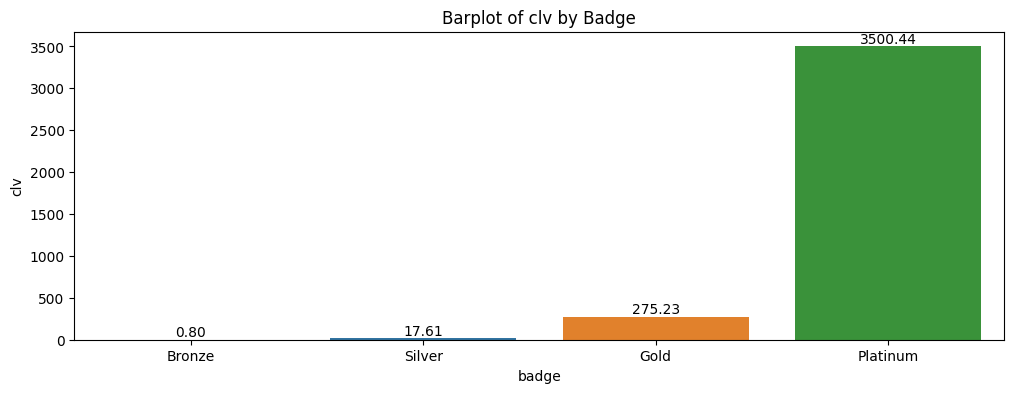

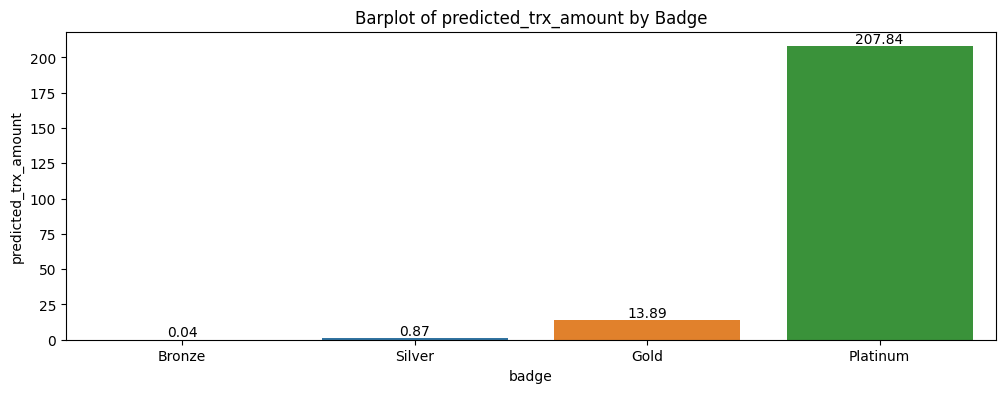

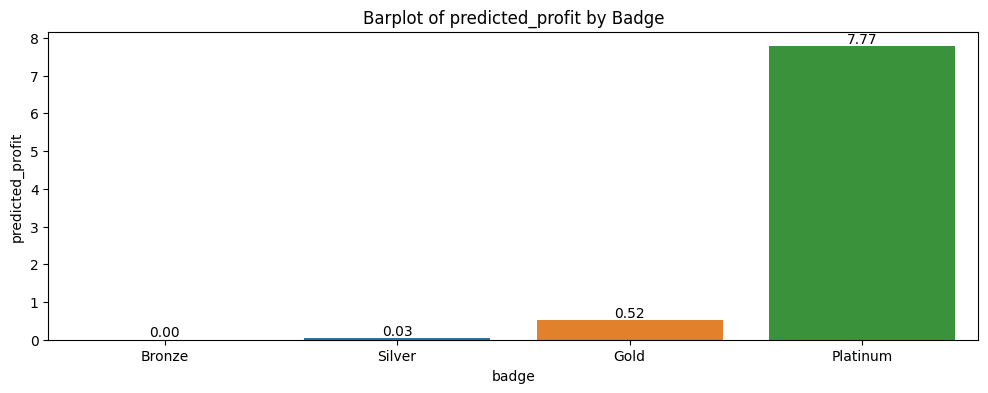

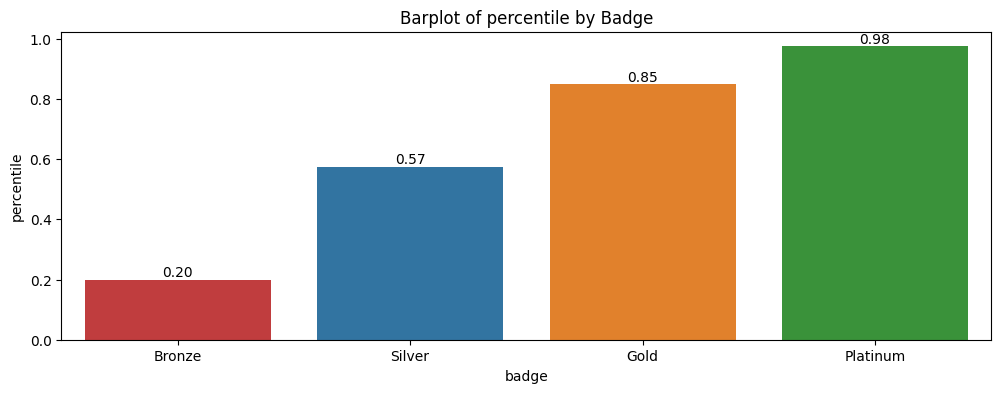

In [ ]:
colors = ["#d62728","#1f77b4", "#ff7f0e", "#2ca02c"]

for f in feature:
    plt.figure(figsize=(12,4))

    ax = sns.barplot(
        x='badge',
        y=f,
        data=repeat_buyer,
        palette=colors,
        errorbar=None
    )
    for container in ax.containers:
      ax.bar_label(container, fmt="%.2f")

    plt.title(f'Barplot of {f} by Badge')
    plt.show()


Text(0.5, 1.0, 'Distribution of CLV')

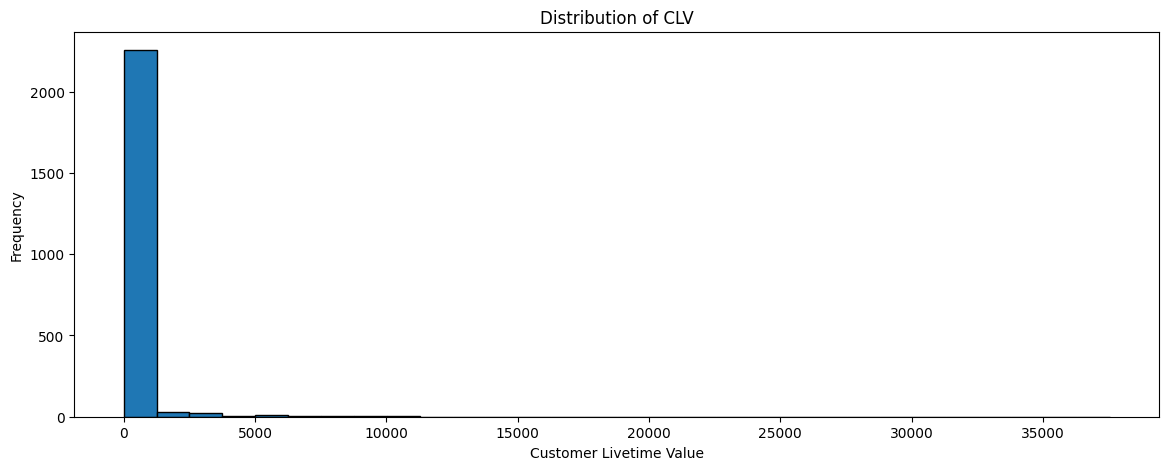

In [ ]:
plt.figure(figsize=(14,5))
plt.hist(repeat_buyer['clv'],bins=30,edgecolor='black')
plt.xlabel('Customer Livetime Value')
plt.ylabel('Frequency')
plt.title('Distribution of CLV')

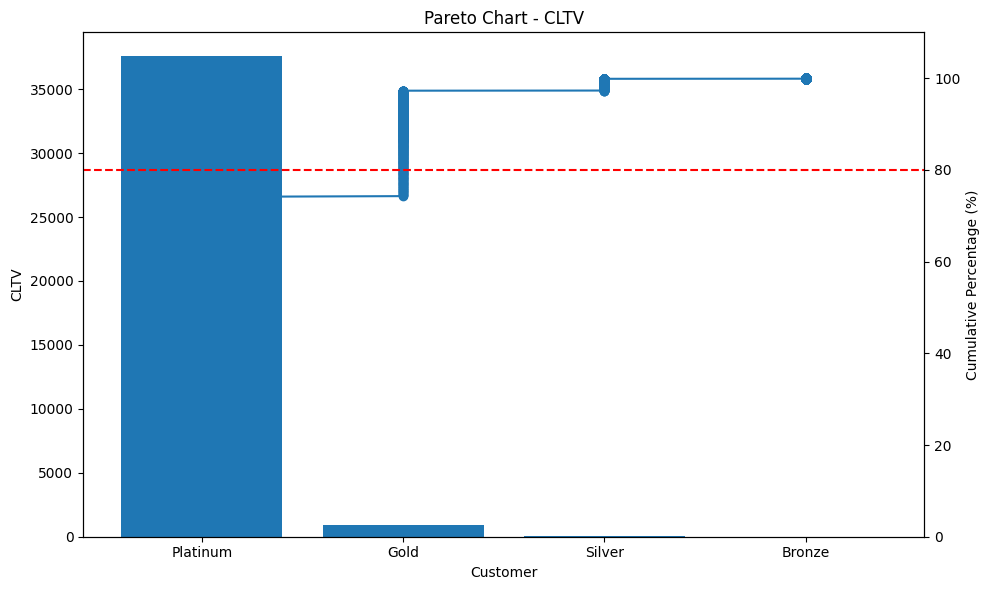

In [ ]:
repeat_buyer = repeat_buyer.sort_values(by="clv", ascending=False)

repeat_buyer['cum_percentage'] = repeat_buyer['clv'].cumsum() / repeat_buyer['clv'].sum() * 100


fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart CLTV
ax1.bar(repeat_buyer['badge'], repeat_buyer['clv'])
ax1.set_xlabel("Customer")
ax1.set_ylabel("CLTV")
ax1.set_title("Pareto Chart - CLTV")

# Line chart persentase kumulatif
ax2 = ax1.twinx()
ax2.plot(repeat_buyer['badge'], repeat_buyer['cum_percentage'], marker="o")
ax2.set_ylabel("Cumulative Percentage (%)")
ax2.set_ylim(0, 110)

# Garis ambang 80%
ax2.axhline(80, color='red', linestyle='--')

plt.tight_layout()
plt.show()
